In [1]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitayamkin","key":"16e471b24fd6e262801175680e4c3a88"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip "creditcardfraud.zip"

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 82% 54.0M/66.0M [00:00<00:00, 162MB/s]
100% 66.0M/66.0M [00:00<00:00, 133MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [8]:
indexes_to_remove = df[df['Class'] == 0].index
indexes_to_remove = indexes_to_remove[:283332]
### УДАЛИМ  500000 ЗАПИСЕЙ ТК НЕ ХВАТАЕТ ОЗУ ДЛЯ ВЫЧИСЛЕНИЙ
df = df.drop(indexes_to_remove)

In [9]:
indexes_to_remove = df[df['Class'] == 1].index
indexes_to_remove = indexes_to_remove[:475]
### УДАЛИМ  500000 ЗАПИСЕЙ ТК НЕ ХВАТАЕТ ОЗУ ДЛЯ ВЫЧИСЛЕНИЙ
df = df.drop(indexes_to_remove)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 262826 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   float64
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   V6      1000 non-null   float64
 7   V7      1000 non-null   float64
 8   V8      1000 non-null   float64
 9   V9      1000 non-null   float64
 10  V10     1000 non-null   float64
 11  V11     1000 non-null   float64
 12  V12     1000 non-null   float64
 13  V13     1000 non-null   float64
 14  V14     1000 non-null   float64
 15  V15     1000 non-null   float64
 16  V16     1000 non-null   float64
 17  V17     1000 non-null   float64
 18  V18     1000 non-null   float64
 19  V19     1000 non-null   float64
 20  V20     1000 non-null   float64
 21  V21     1000 non-null   float64
 22

In [11]:
df.shape

(1000, 31)

In [12]:
df.describe()

Time           V1           V2           V3           V4  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   172226.017000    -0.022342     0.413349    -0.774252    -0.069967   
std      1023.346305     2.033083     1.560217     1.650325     1.523161   
min    160665.000000   -12.516732   -11.112584   -16.233798    -4.422745   
25%    172111.750000    -0.958918    -0.359553    -1.596146    -0.845863   
50%    172324.500000    -0.139429     0.285985    -0.647008    -0.329258   
75%    172553.250000     1.932023     1.069844     0.112949     0.487249   
max    172792.000000     2.354104    10.187818     3.682205     7.756915   

                V5           V6           V7           V8           V9  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.227782    -0.154520     0.138013     0.097628     0.025983  ...   
std       1.740276     1.514350     1.750968     1.158744     1.092325  ...   
min     -40.427726    -5.773192    -6.783964   -15.415385    -4.588536  ...   
25%      -0.378996    -0.947338    -0.477681    -0.264948    -0.436960  ...   
50%       0.249196    -0.467278     0.208528     0.000369     0.018356  ...   
75%       0.870791     0.187508     0.742146     0.416385     0.576357  ...   
max       9.880564    23.917837    44.054461     7.305334     6.459490  ...   

               V21          V22          V23          V24          V25  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.004759     0.066170     0.045334     0.010149    -0.134086   
std       0.509114     0.763553     0.388986     0.569517     0.547960   
min      -6.389132    -1.642559    -1.647020    -2.011351    -2.199824   
25%      -0.253497    -0.601934    -0.133260    -0.346781    -0.426841   
50%      -0.018067     0.090061     0.040363     0.012025    -0.223225   
75%       0.236504     0.719532     0.205203     0.528076     0.192530   
max       3.961879     2.249964     7.040028     1.209942     2.520869   

               V26          V27          V28        Amount        Class  
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000  
mean      0.005204     0.014088    -0.000696     71.228890     0.017000  
std       0.461871     0.400540     0.271347    347.517565     0.129336  
min      -1.420358    -2.616341    -3.323162      0.000000     0.000000  
25%      -0.279625    -0.072970    -0.061277      4.450000     0.000000  
50%       0.025513    -0.006872    -0.025073     15.000000     0.000000  
75%       0.206264     0.134403     0.084517     55.352500     0.000000  
max       2.587527     3.478175     1.474616  10199.440000     1.000000  

[8 rows x 31 columns]

Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов не взималась плата за товары, которые они не покупали.

Набор данных содержит транзакции, совершенные европейскими держателями кредитных карт в сентябре 2013 года.

В этом наборе данных представлены транзакции, которые произошли за два дня, и мы имеем 492 случая мошенничества из 284 807 транзакций. Набор данных крайне несбалансирован, на позитивный класс (мошенничество) приходится 0,172% всех транзакций.

Датасет содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за конфиденциальности мы не можем предоставить исходные признаки и дополнительную справочную информацию о данных. Признаки V1, V2, ... V28 являются основными компонентами, полученными с помощью PCA. Единственными характеристиками, которые не были преобразованы с помощью PCA, являются "Время" ("Time") и "Сумма" ("Amount"). Параметр "Время" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Параметр "Сумма" - это сумма транзакции, которую можно использовать, например, для обучения, зависящего от затрат. Параметр "Класс" ("Class") - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

In [13]:
df['Class'].value_counts()

Class
0    983
1     17
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b029d8d4bb0>,
 [Text(-3.295294786874804, 0.17615977859812387, '1'),
  Text(3.2952947765665055, -0.1761599714279763, '0')],
 [Text(-1.7974335201135292, 0.09608715196261301, '98.3%'),
  Text(1.797433514490821, -0.09608725714253251, '1.7%')])

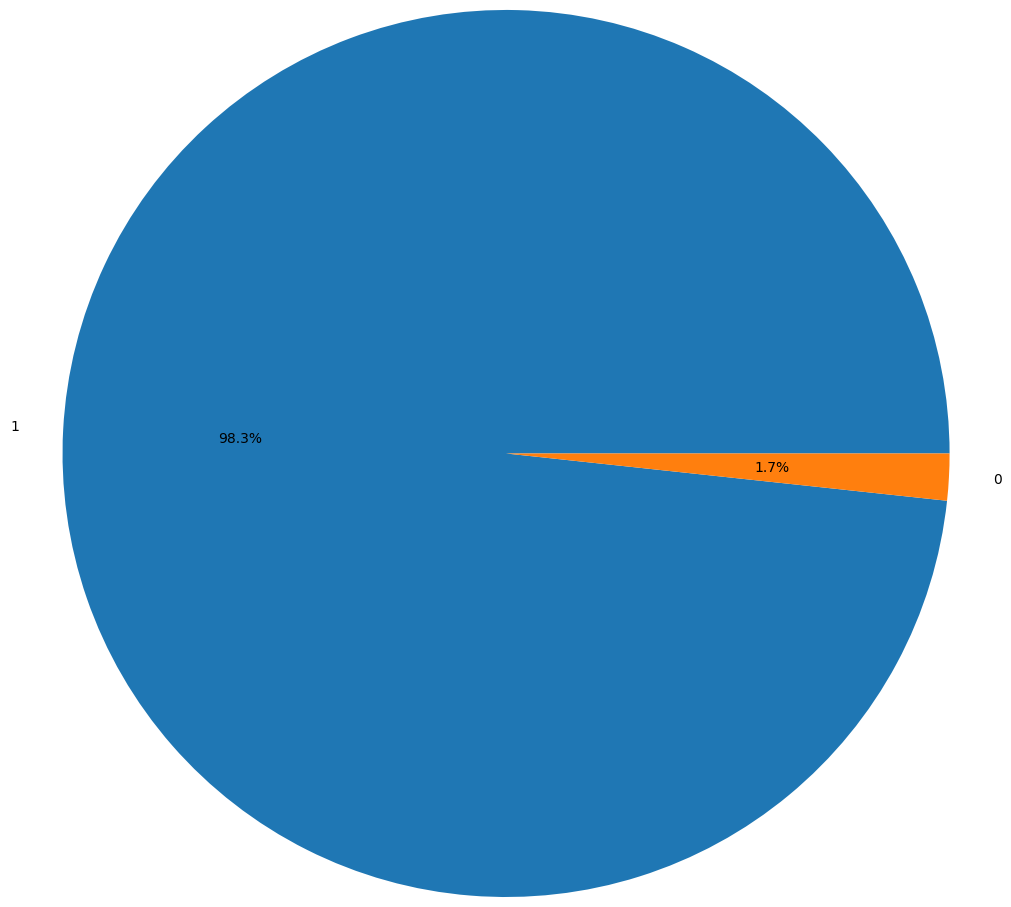

In [14]:
plt.pie(df['Class'].value_counts(), radius = 3, labels = df['Class'].unique(), autopct='%1.1f%%')

По оси X отображаются интервалы значений (или "бины") переменных, которые представлены в датафрейме df. Эти интервалы делят диапазон значений на группы, и каждая группа отображает количество значений, которые попадают в этот интервал.

По оси Y отображается частота (или количество) значений, попадающих в каждую из этих групп.

Таким образом:
- Ось X: Интервалы значений переменных.
- Ось Y: Количество (или частота) значений, попадающих в каждый интервал.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

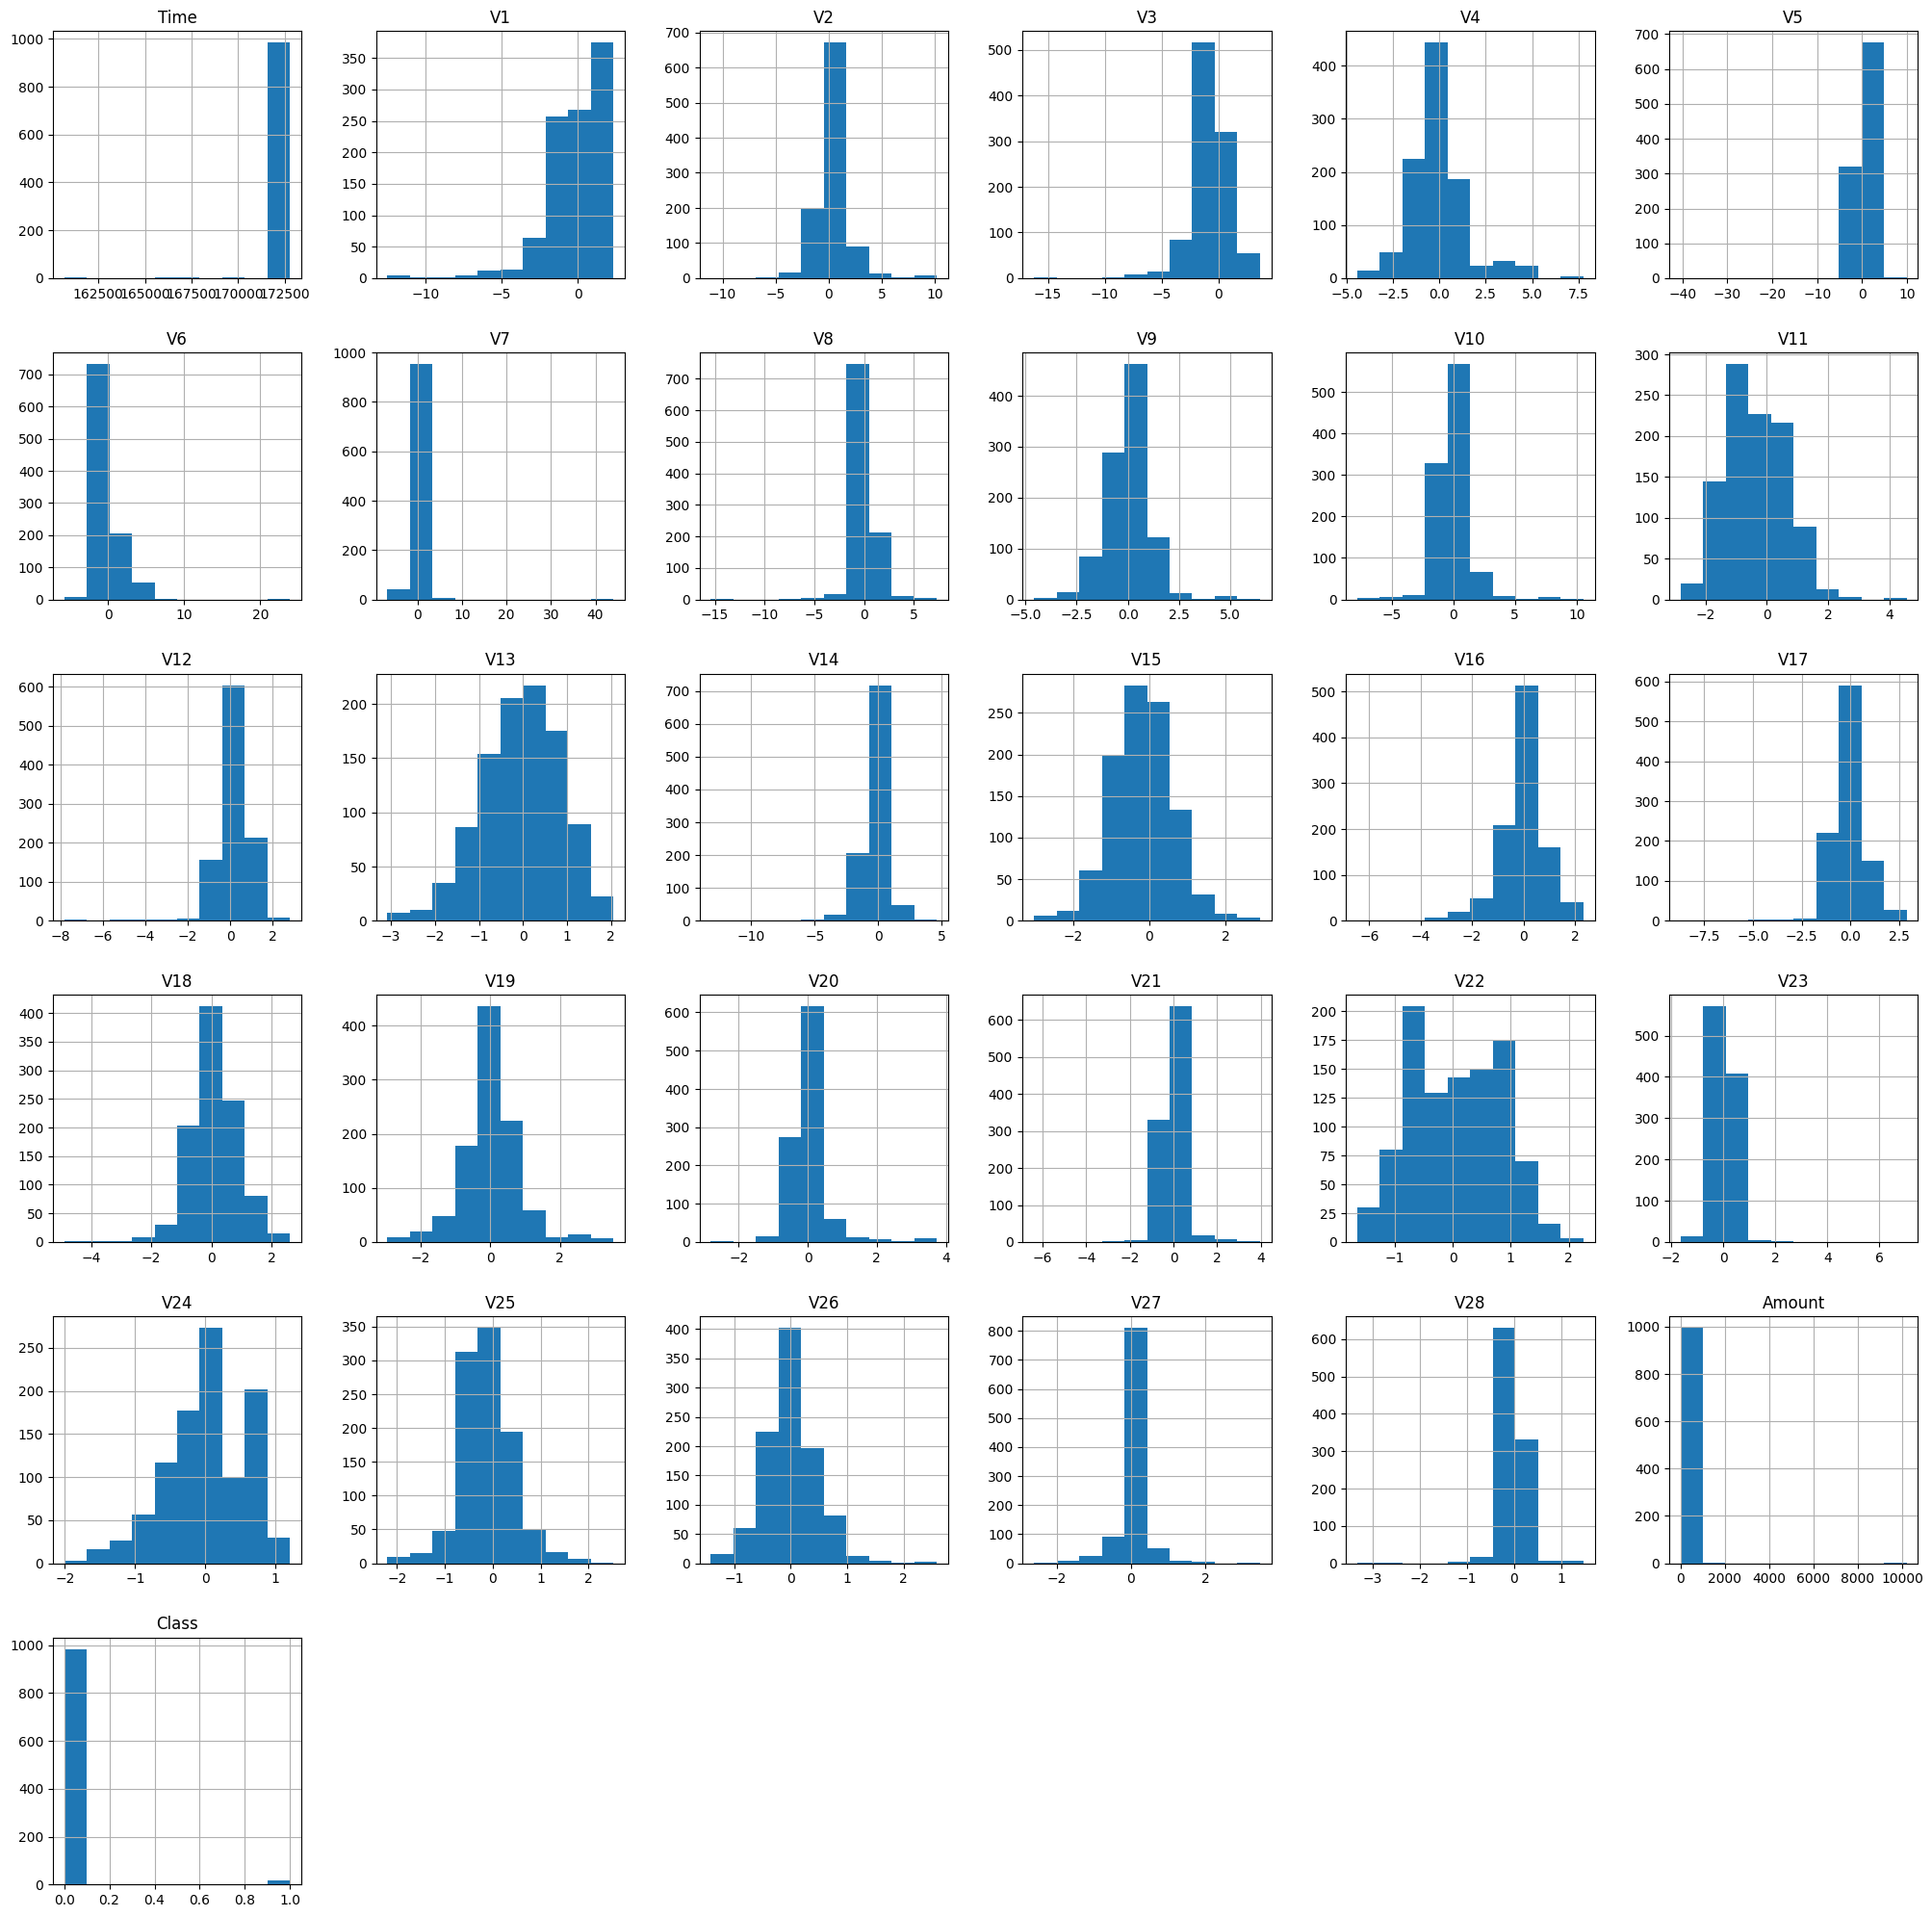

In [15]:
df.hist(figsize = (25,25))

<Axes: >

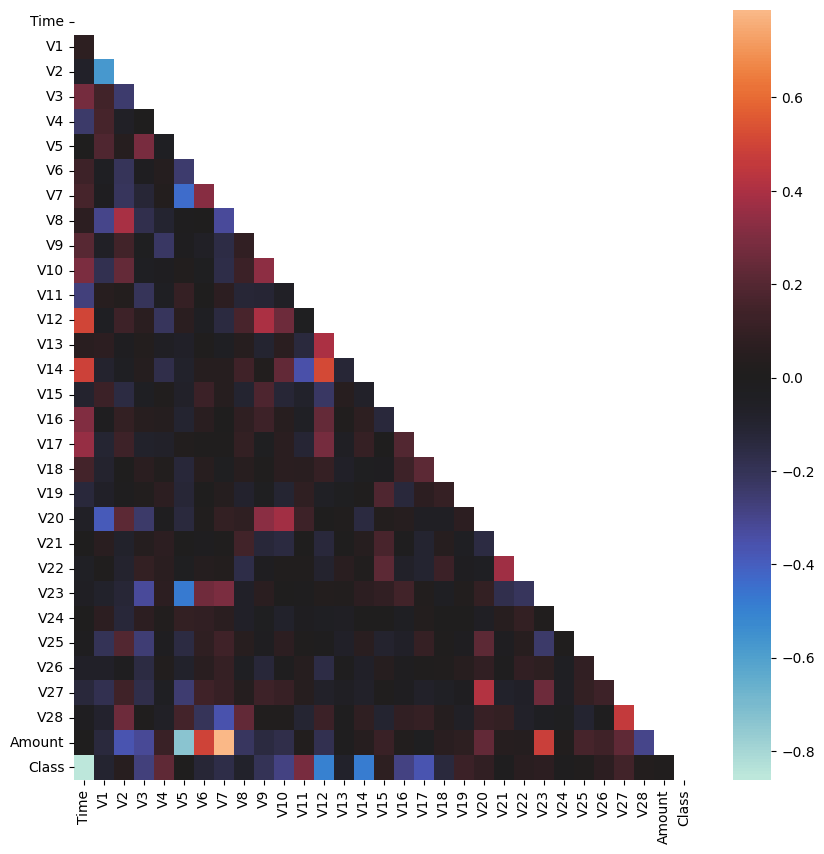

In [16]:
plt.figure(figsize = (10, 10))
corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
sns.heatmap(lower, cbar = True, center = 0)

In [17]:
high_corr = [column for column in lower.columns if any(lower[column] > 0.3)]
high_corr

['Time', 'V2', 'V6', 'V7', 'V9', 'V10', 'V12', 'V20', 'V21', 'V23', 'V27']

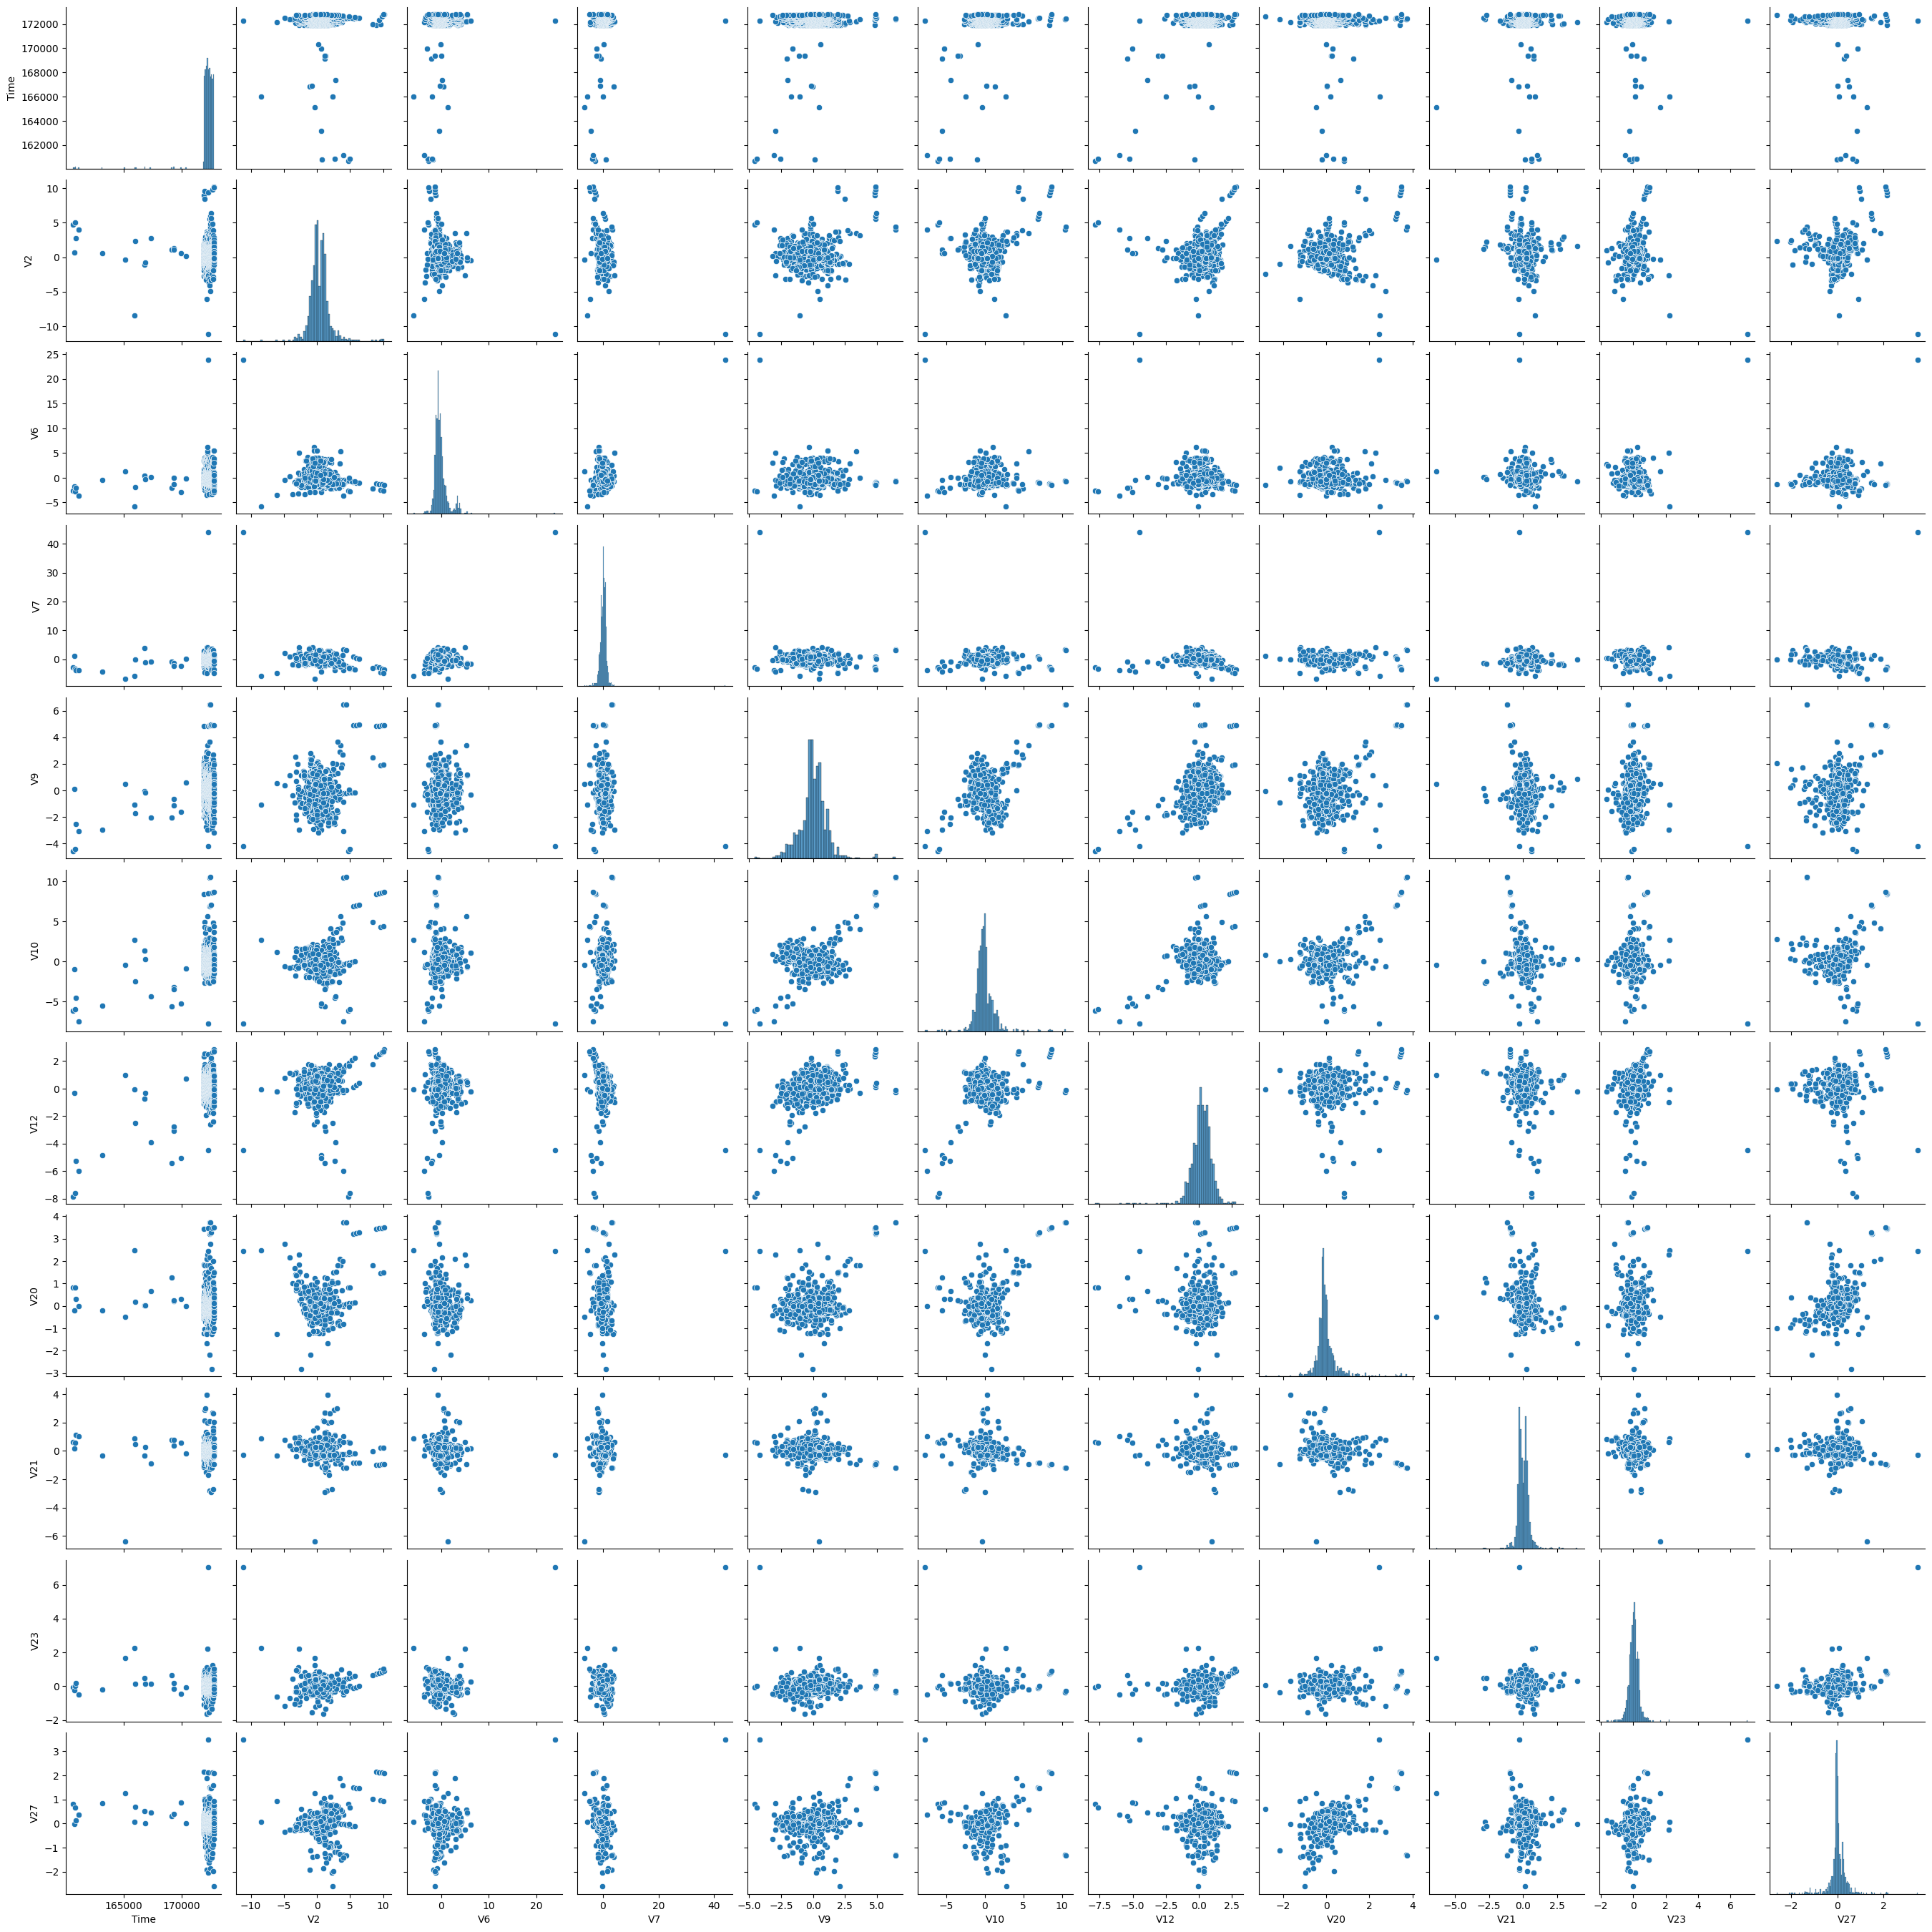

In [18]:
sns.pairplot(df[high_corr])

In [19]:
# выделим признаки из данных
data_features = df.iloc[:, :-1]
data_features

Time         V1         V2        V3        V4        V5  \
262826  160665.0  -0.417340   4.700055 -7.521767  7.671884  0.260821   
263080  160791.0   2.132386   0.705608 -3.530759  0.514779  1.527175   
263274  160870.0  -0.644278   5.002352 -8.252739  7.756915 -0.216267   
263324  160895.0  -0.848290   2.719882 -6.199070  3.044437 -3.301910   
263877  161154.0  -3.387601   3.977881 -6.978585  1.657766 -1.100500   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
262826 -2.646693 -2.854432  0.958783 -4.588536  ...  0.832035  0.622200   
263080 -1.716268  1.132791 -0.574214  0.128904  ... -0.211167  0.163739   
263274 -2.751496 -3.358857  1.406268 -4.403852  ...  0.816558  0.587728   
263324 -1.992117 -3.734902  1.520079 -2.548788  ...  0.319576  1.125229   
263877 -3.599487 -3.686651  1.942252 -3.065089  ... -0.004301  1.043587   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.475829  0.213454   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.059616  0.214205   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.001396  0.232045   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.127434  0.265245   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
262826 -0.437708 -0.090358 -0.742802 -0.312361  0.502575  0.821390  0.372379   
263080  0.703910 -0.245076  0.460049  0.920281 -0.216586 -0.026219 -0.025001   
263274 -0.605759  0.033746 -0.756170 -0.008172  0.532772  0.663970  0.192067   
263324  0.805258  0.199119  0.035206  0.012159  0.601658  0.137468 -0.171397   
263877  0.262189 -0.479224 -0.326638 -0.156939  0.113807  0.354124  0.287592   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
262826    0.77  
263080    1.00  
263274    0.77  
263324  127.14  
263877    0.38  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[1000 rows x 30 columns]

In [20]:
y_test = df['Class']

## Статистические методы

#### 3 Сигмы

In [22]:
# Нормализация значений признаков (необязательно, но желательно!)
from sklearn.preprocessing import MinMaxScaler
X_data = MinMaxScaler().fit_transform(data_features.iloc[:, :-1])
Y_data = df.iloc[:, -1]

In [23]:
sigma_outliers = []
for i in range(3, 4): # возможность тестирования для различных кратных значений сигма
    up_bound = X_data.mean(axis=0) + i * X_data.std(axis=0)
    low_bound = X_data.mean(axis=0) - i * X_data.std(axis=0)
    sigma_outliers.append(np.where((X_data < low_bound) | (X_data > up_bound), 1, 0).any(axis=1).astype('int8'))

In [24]:
# Подсчет количества и процента выбросов для разных сигм
sum_list = np.array(sigma_outliers).sum(axis=1)
mean_list = np.array(sigma_outliers).mean(axis=1)

In [25]:
# Сохраняем значения для отклонения с наименьшим процентом выбросов
sigma_outliers = np.array(sigma_outliers)[sum_list.argmin()]

# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке для {} сигм: {}'.format(sum_list.argmin() + 3, sum_list.min()))
print('Процент выбросов в выборке для {} сигм: {:.2%}'.format(mean_list.argmin() + 3, mean_list.min()))

Количество выбросов в выборке для 3 сигм: 158
Процент выбросов в выборке для 3 сигм: 15.80%


In [26]:
sigma_outliers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [27]:
data_features.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [28]:
sigma=pd.DataFrame(columns=['upper_bound',	'lower_bound',	'anomalies_count',	'anomalies_percentage'])
threshold = 3
for col in data_features.columns:
  up_bound = data_features[col].mean() + threshold * data_features[col].std()
  low_bound = data_features[col].mean() - threshold * data_features[col].std()
  anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).sum(axis=1)>=1
  sigma.loc[col] = [up_bound, low_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]

sigma

upper_bound    lower_bound  anomalies_count  anomalies_percentage
Time    175296.055916  169155.978084             13.0                   1.3
V1           6.076908      -6.121592             15.0                   1.5
V2           5.093999      -4.267300             16.0                   1.6
V3           4.176725      -5.725228             15.0                   1.5
V4           4.499517      -4.639451             16.0                   1.6
V5           5.448610      -4.993047              4.0                   0.4
V6           4.388531      -4.697571              7.0                   0.7
V7           5.390918      -5.114892              3.0                   0.3
V8           3.573861      -3.378604             22.0                   2.2
V9           3.302960      -3.250993             14.0                   1.4
V10          4.128413      -4.224180             23.0                   2.3
V11          2.540286      -3.276761              4.0                   0.4
V12          2.812570      -2.470570             14.0                   1.4
V13          2.644696      -2.717532              5.0                   0.5
V14          3.339924      -3.745080             13.0                   1.3
V15          2.205541      -2.565262             10.0                   1.0
V16          2.691481      -2.732418             11.0                   1.1
V17          2.609656      -2.761309             11.0                   1.1
V18          2.438301      -2.237378              8.0                   0.8
V19          2.428865      -2.379310             25.0                   2.5
V20          1.673371      -1.674466             23.0                   2.3
V21          1.532100      -1.522581             15.0                   1.5
V22          2.356831      -2.224490              0.0                   0.0
V23          1.212293      -1.121625             10.0                   1.0
V24          1.718699      -1.698401              1.0                   0.1
V25          1.509794      -1.777966             17.0                   1.7
V26          1.390818      -1.380409              9.0                   0.9
V27          1.215709      -1.187533             30.0                   3.0
V28          0.813345      -0.814737             18.0                   1.8
Amount    1113.781585    -971.323805              3.0                   0.3

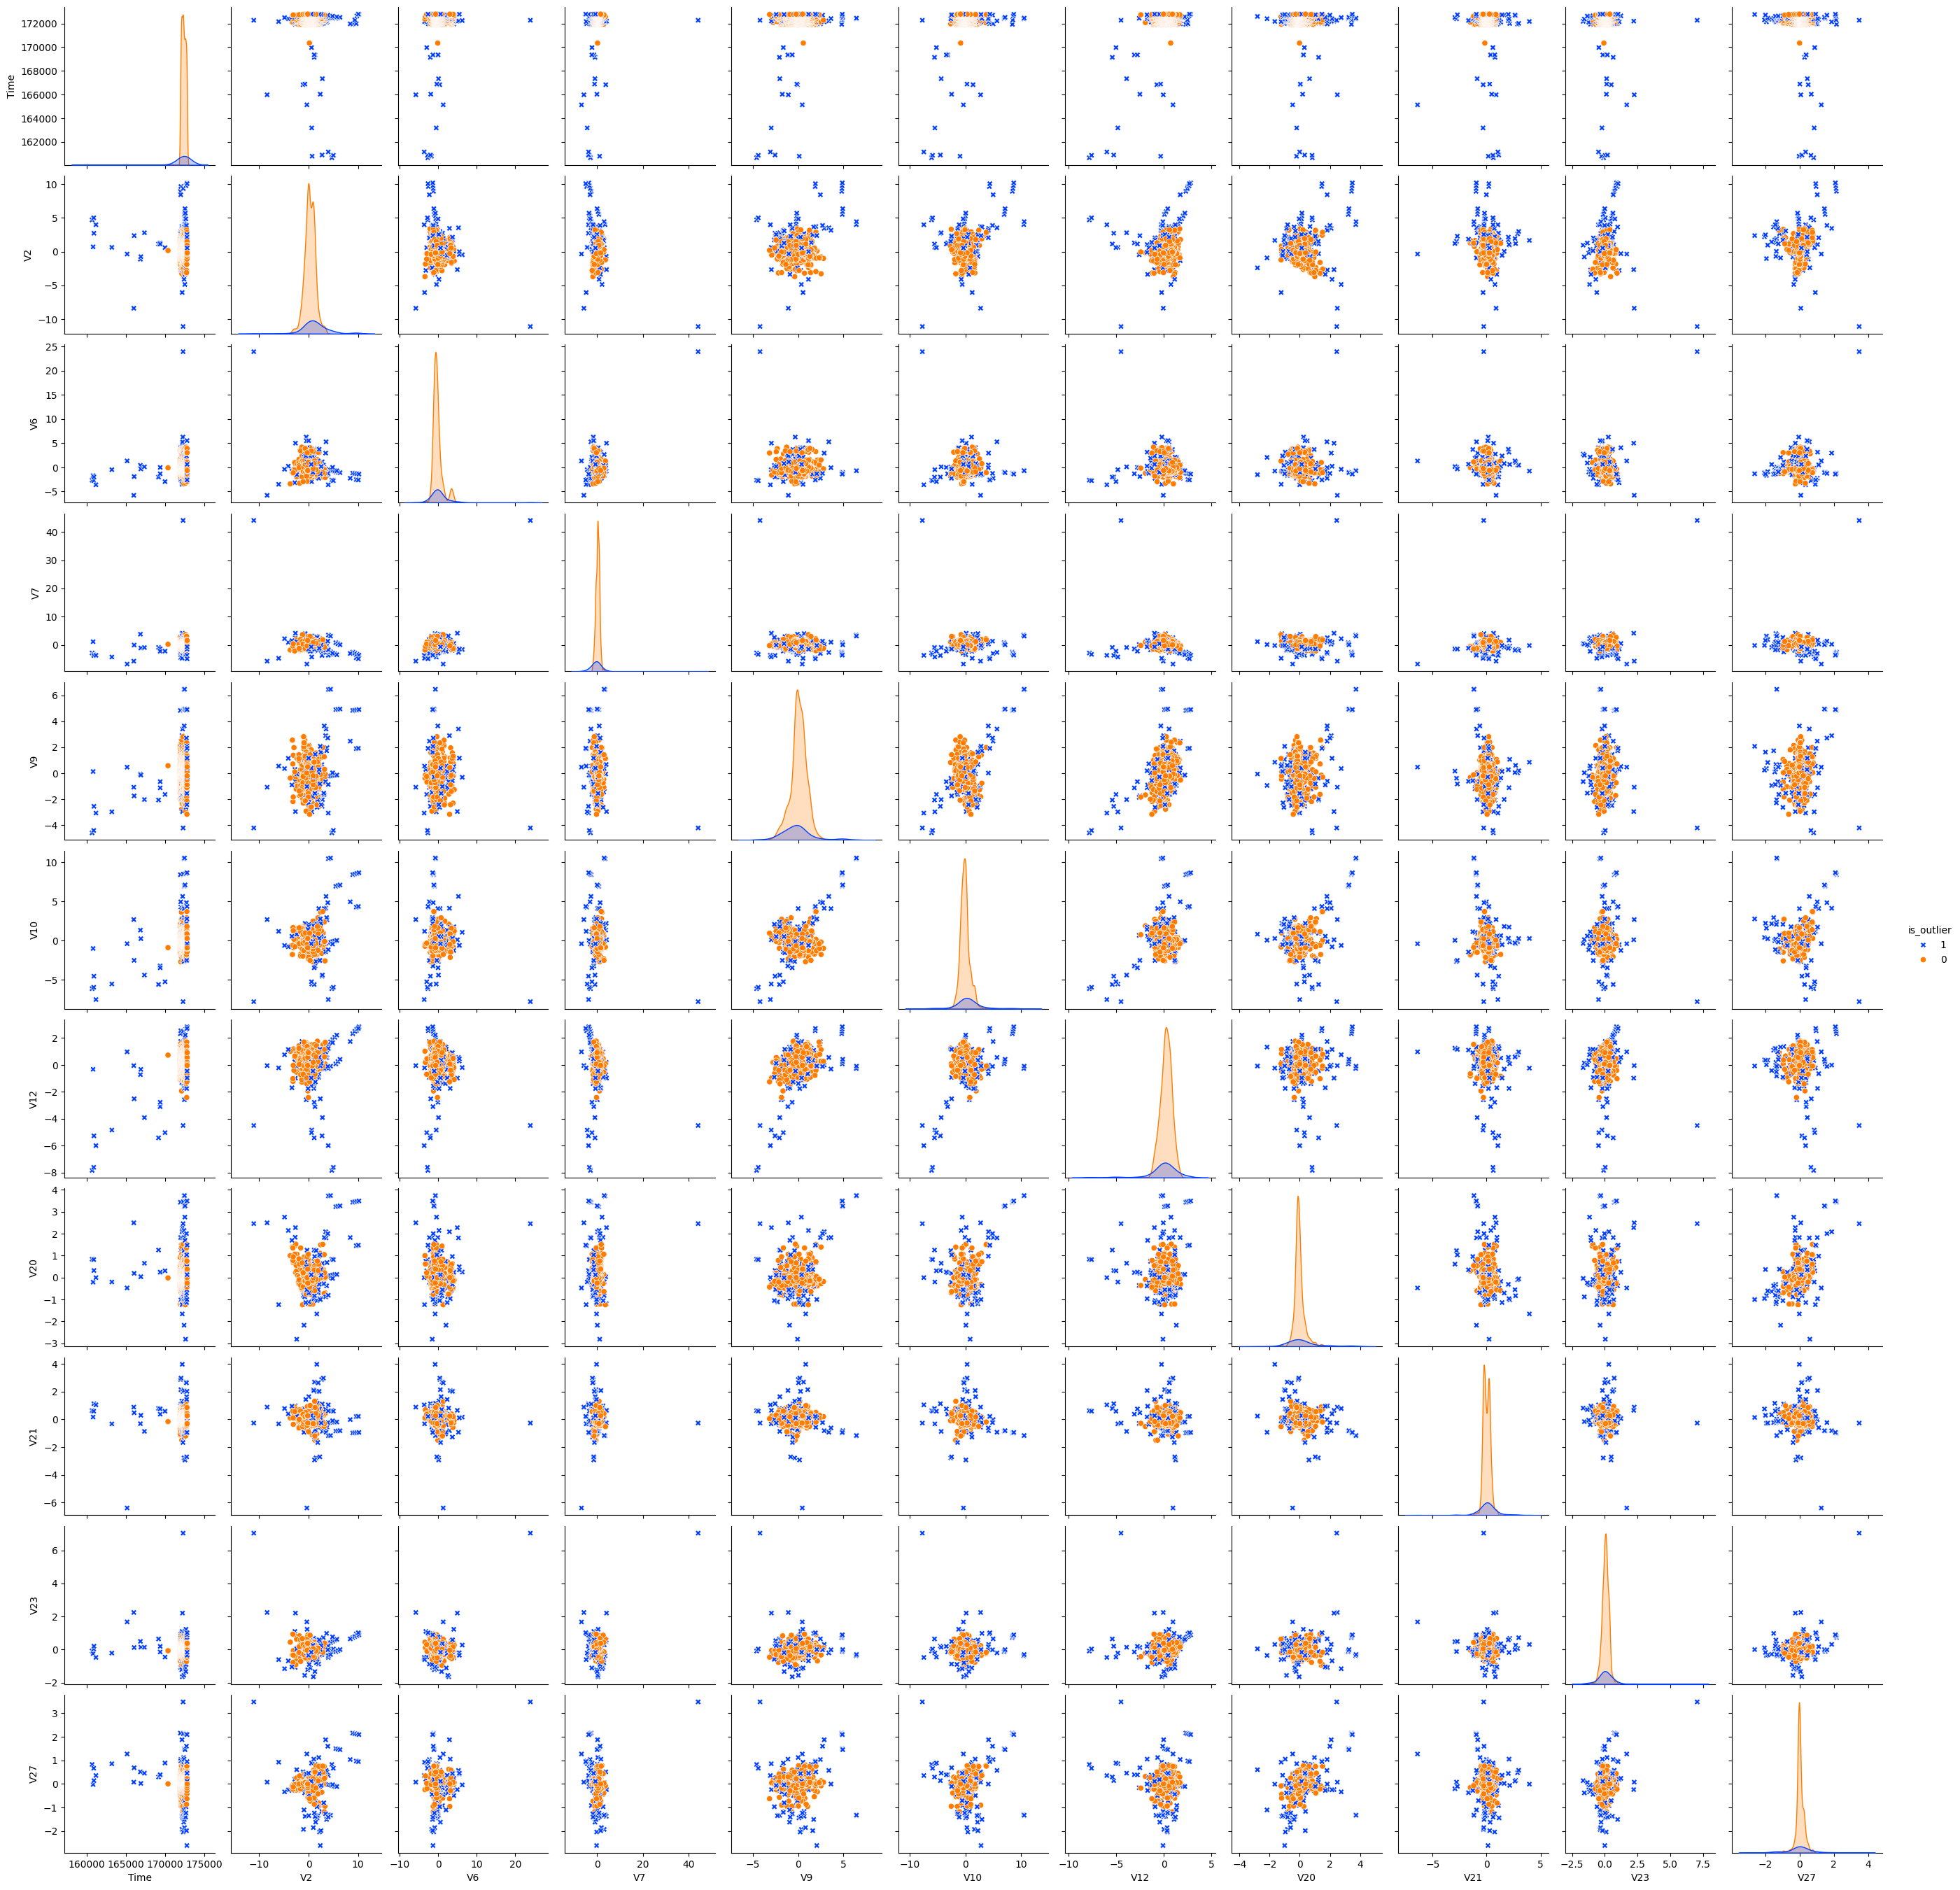

In [29]:
labeled_data = data_features[high_corr].copy()
labeled_data['is_outlier'] = sigma_outliers

sns.pairplot(data=labeled_data, vars = high_corr,
             hue='is_outlier', hue_order=[1, 0],
             markers=['o', 'X'],  palette='bright');

#### Межквартильное отклонение

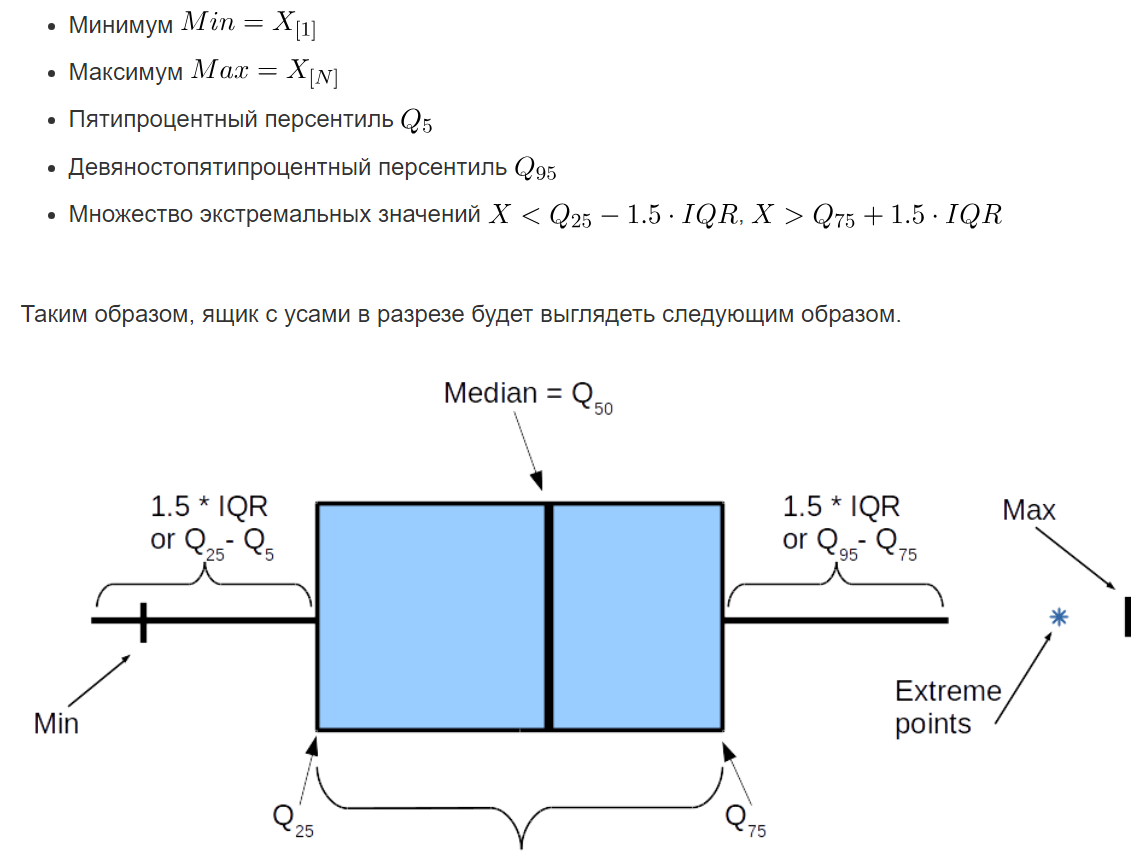

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


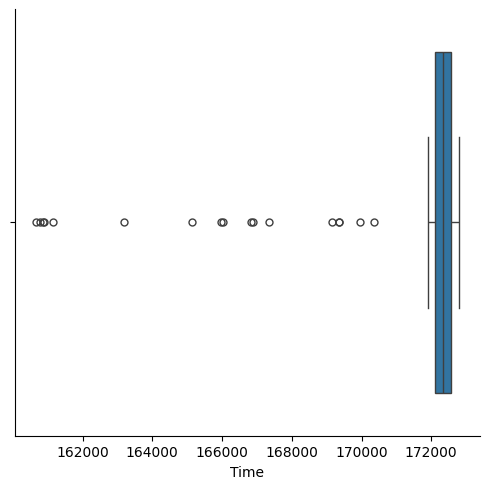

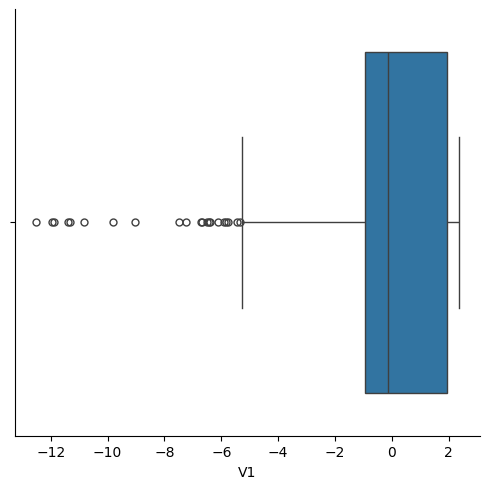

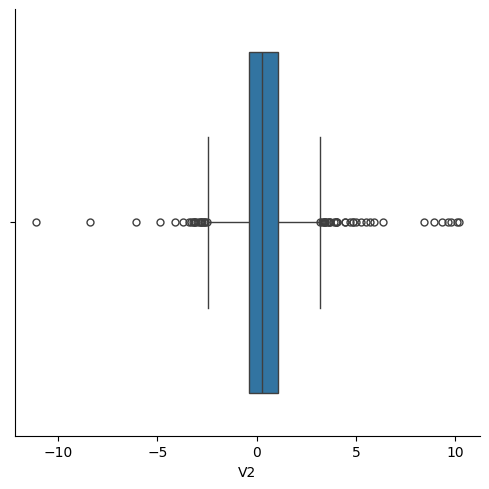

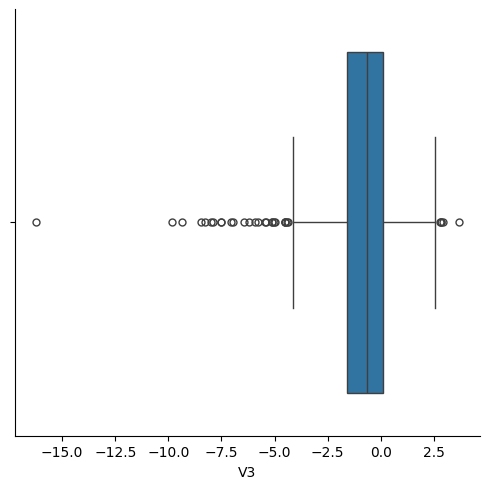

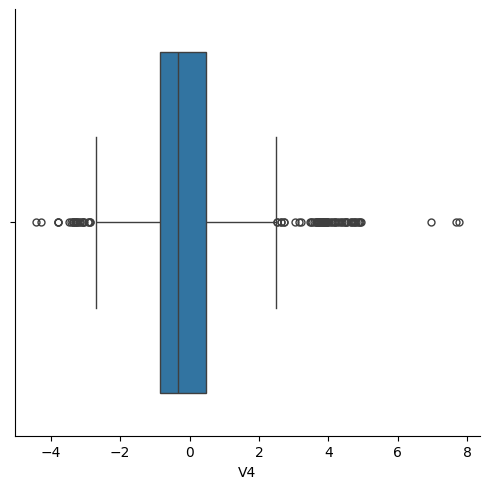

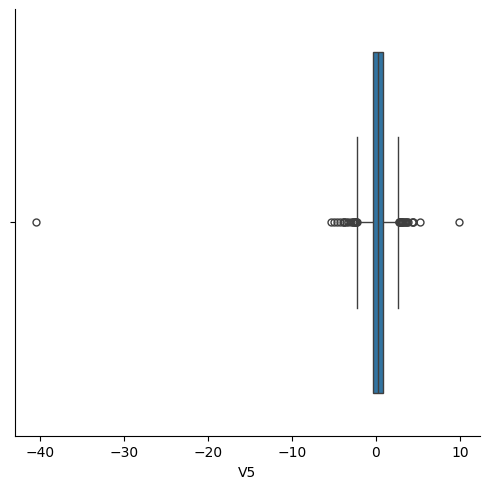

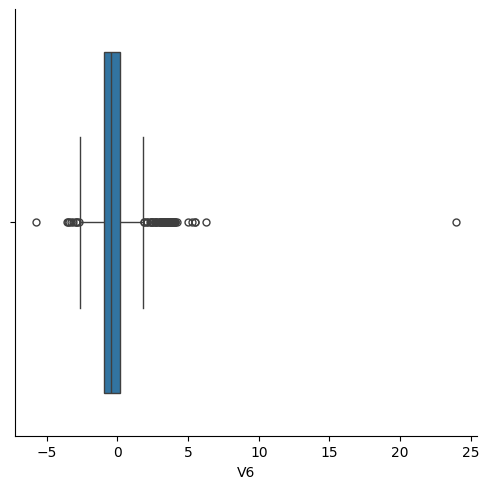

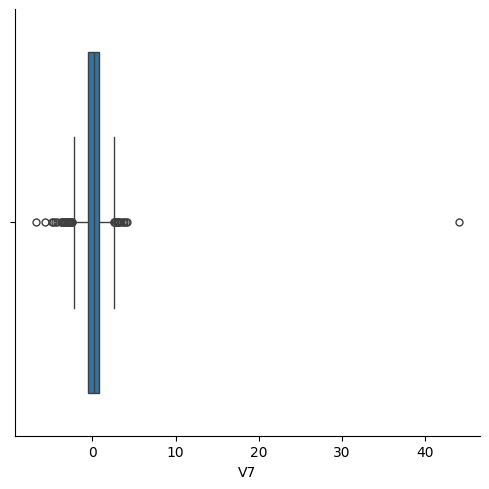

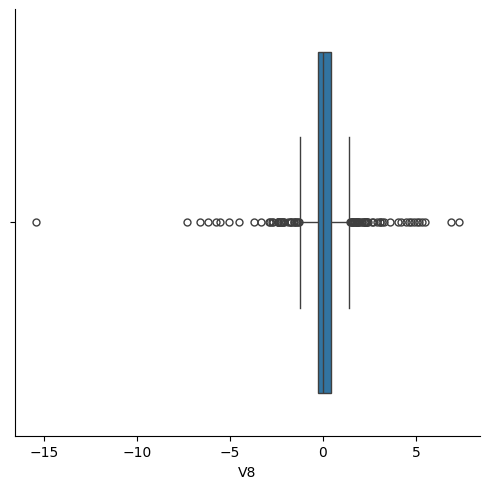

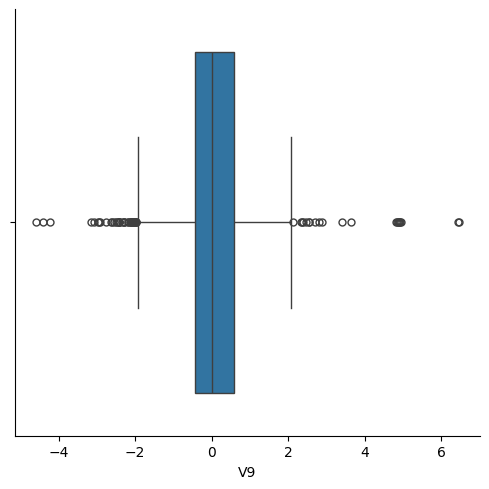

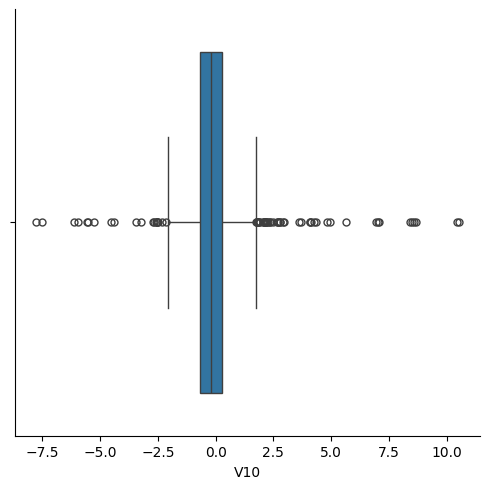

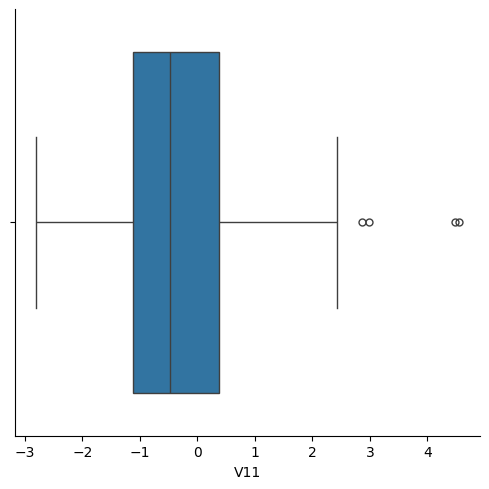

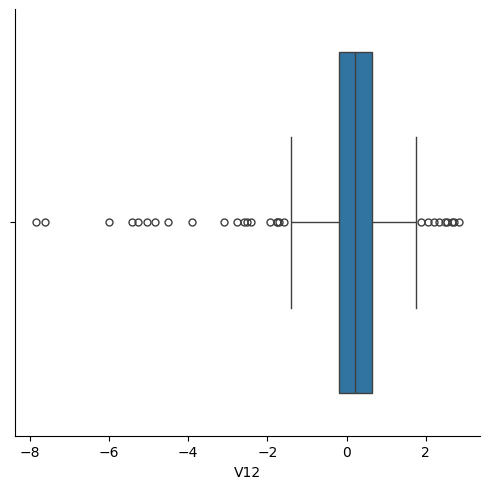

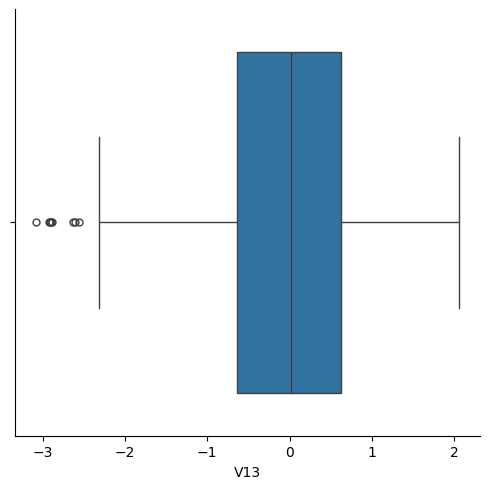

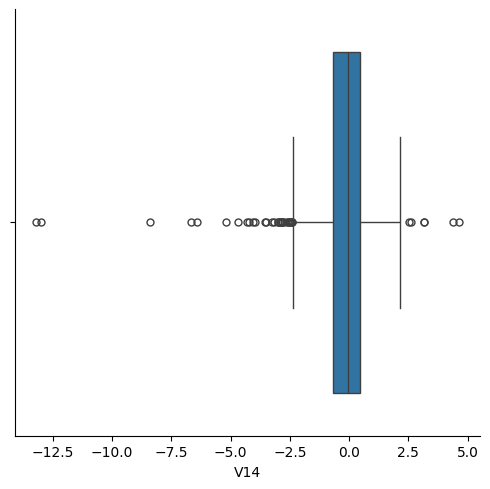

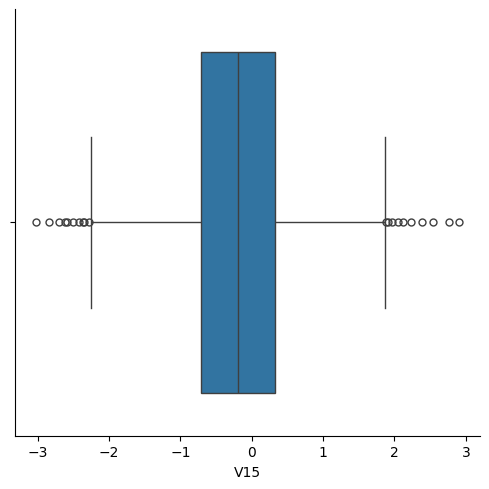

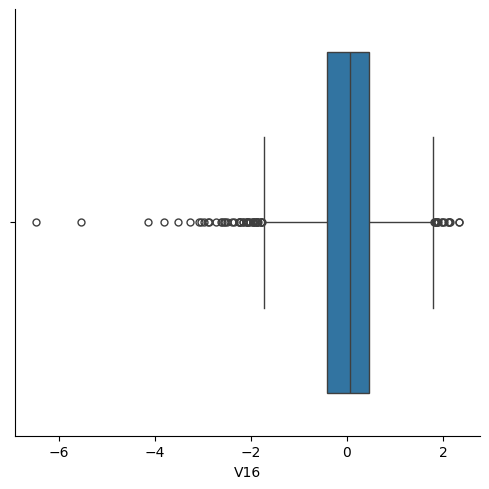

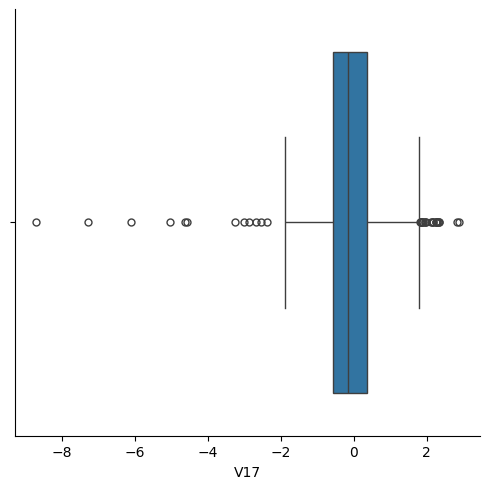

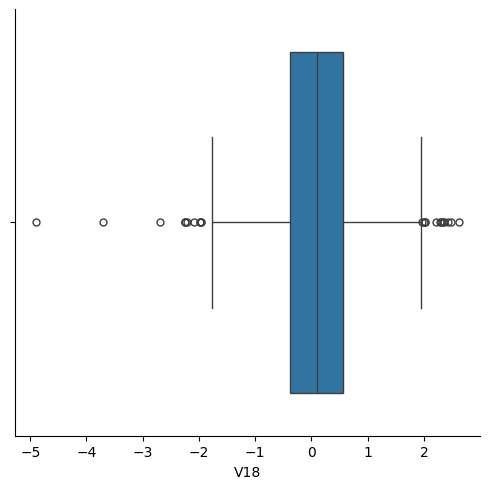

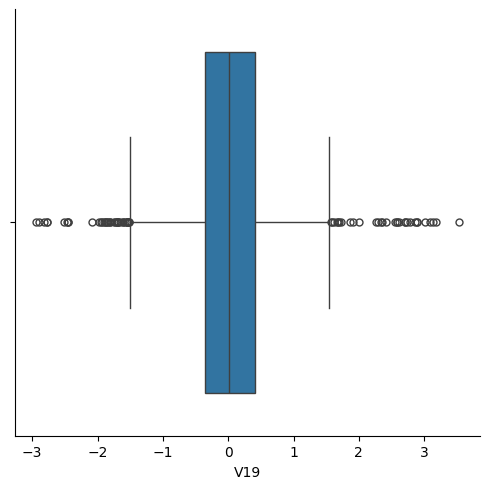

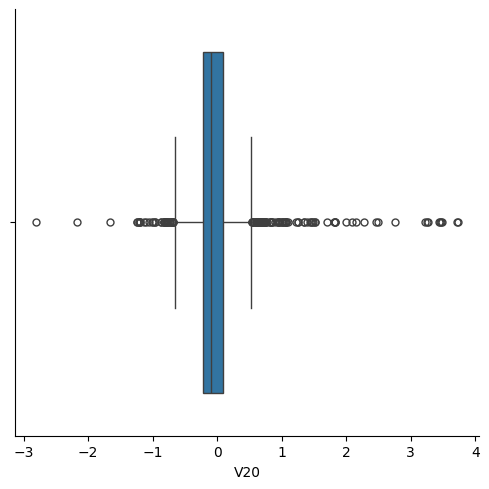

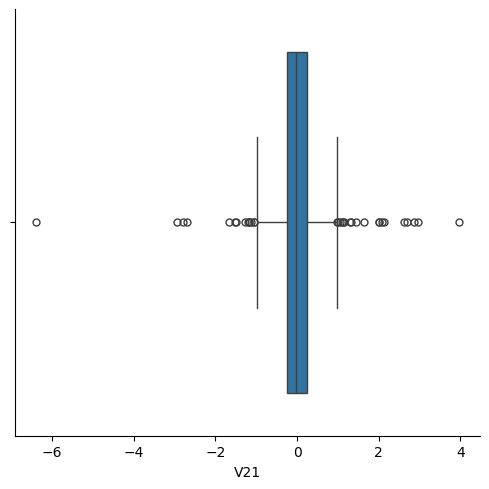

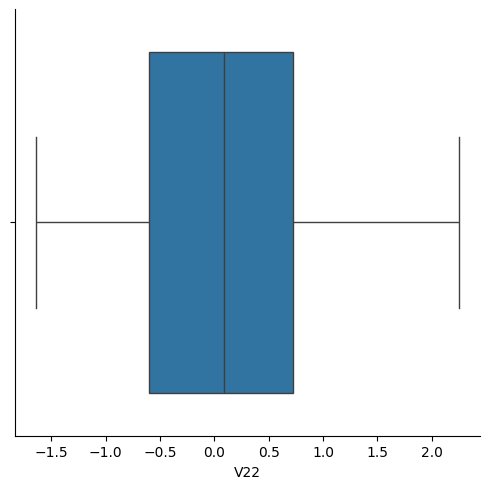

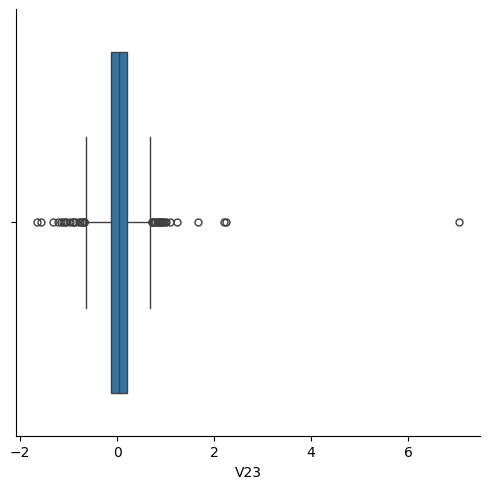

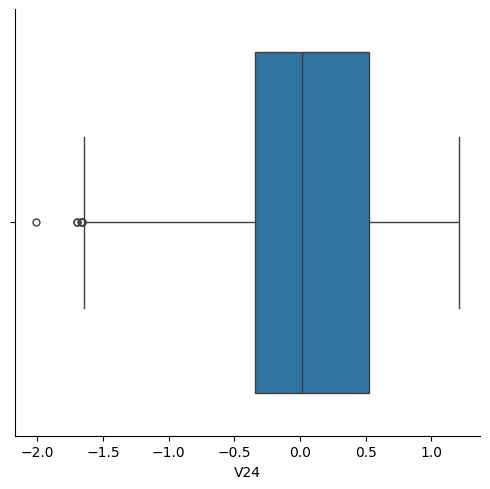

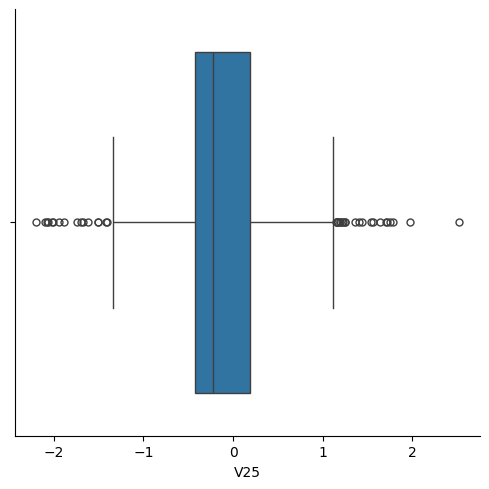

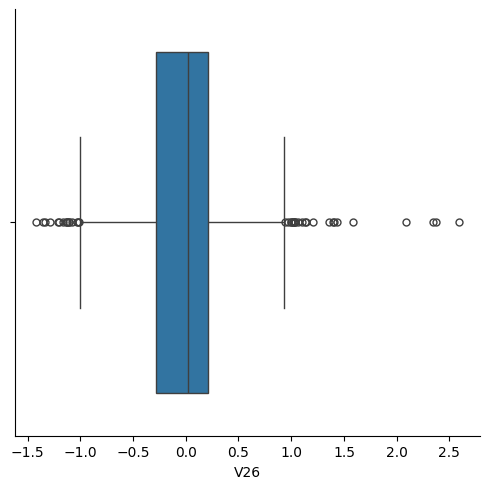

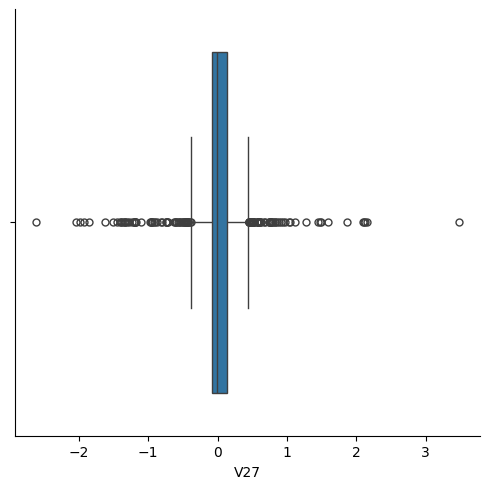

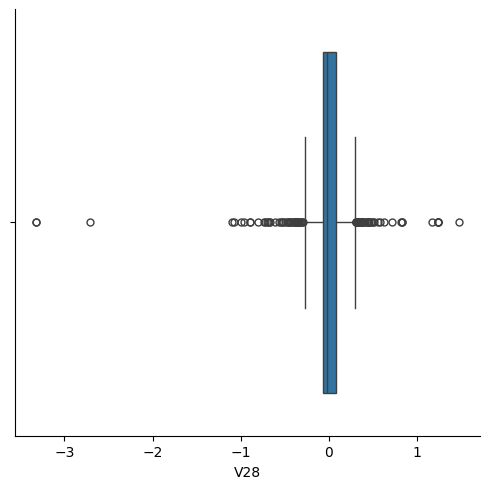

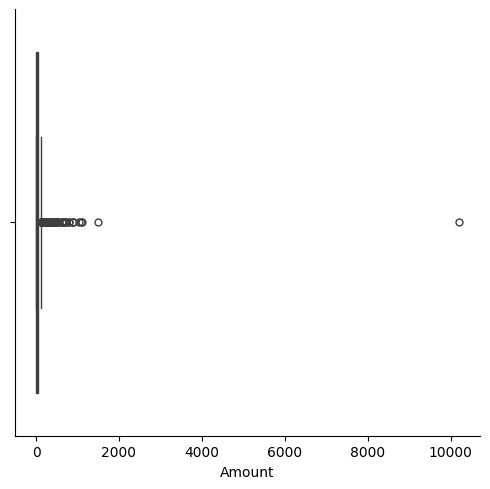

In [30]:
for col in data_features.columns:
  sns.catplot(data=data_features[col], kind="box", orient = 'h')

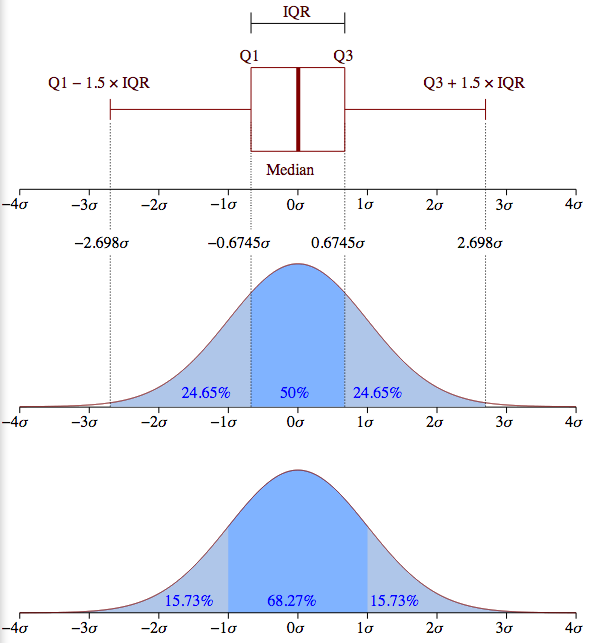

In [31]:
box=pd.DataFrame(columns=['upper_bound',	'lower_bound',	'anomalies_count',	'anomalies_percentage'])
threshold=1.5 #
for col in data_features.columns:
    IQR = data_features[col].quantile(0.75) - data_features[col].quantile(0.25)
    up_bound = data_features[col].quantile(0.75) + (IQR * threshold)
    low_bound = data_features[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data_features[col]>up_bound, data_features[col]<low_bound], axis=1).sum(axis=1)>=1
    box.loc[col] = [up_bound, low_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]

In [32]:
# отслеживаем аномалии по точкам
data_anom = pd.DataFrame(columns = data_features.columns)
for col in data_features.columns:
  IQR = data_features[col].quantile(0.75) - data_features[col].quantile(0.25)
  up_bound = data_features[col].quantile(0.75) + (IQR * threshold)
  low_bound = data_features[col].quantile(0.25) - (IQR * threshold)
  data_anom[col] = pd.concat([data_features[col]>up_bound, data_features[col]<low_bound], axis=1).sum(axis=1)>=1

In [33]:
# Это аномалии, НО! Они дублируются
data_anom.sum(axis=0)

Time       17
V1         21
V2         54
V3         31
V4         90
V5         44
V6         85
V7         38
V8         82
V9         63
V10        66
V11         4
V12        28
V13         8
V14        36
V15        20
V16        60
V17        35
V18        24
V19        68
V20       122
V21        33
V22         0
V23        39
V24         6
V25        39
V26        39
V27       123
V28        95
Amount    114
dtype: int64

In [34]:
# а вот так уже без перекрытий
data_anom.sum(axis=1)>0

262826    True
263080    True
263274    True
263324    True
263877    True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Length: 1000, dtype: bool

In [35]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(data_anom.sum(axis=1)>0)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(data_anom.sum(axis=1)>0)/len(df)))

Количество выбросов в выборке: 504
Процент выбросов в выборке: 50.40%


In [36]:
iqr_outliers = np.array([1 if label == True
                           else 0 for label in data_anom.sum(axis=1)>0])

In [37]:
iqr_outliers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

## Кластеризация

In [38]:
# Так как мы имеем дело с расстояниями - нужно убедиться, что все данные в одном масштабе
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features),
    columns=data_features.columns
)

#### Иерархическая кластеризация (агломеративная)

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2,
                                  metric = 'euclidean',
                                  # linkage = 'single'
                                  linkage = 'ward'
                                  )
cluster.fit_predict(scaled_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
# !pip install scikit-learn-intelex
# !pip install scipy
# !pip install cudatoolkit
# !pip install cudnn
# !pip install dpcpp-cpp-rt

# from sklearnex import patch_sklearn, config_context
# patch_sklearn()
# from sklearn.cluster import AgglomerativeClustering

# with config_context(target_offload="gpu:0"):
#   cluster = AgglomerativeClustering(n_clusters = 2,
#                                   metric = 'euclidean',
#                                   linkage = 'single'
#                                   # linkage = 'ward'
#                                   )
#   cluster.fit_predict(scaled_data)


In [41]:
hier_outliers = np.array([1 if label == np.argmin(np.unique(cluster.labels_, return_counts= True)[1])
                           else 0 for label in cluster.labels_])

In [42]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(hier_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(hier_outliers)/len(df)))

Количество выбросов в выборке: 1
Процент выбросов в выборке: 0.10%


#### Distance-based (t-SNE)

In [43]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

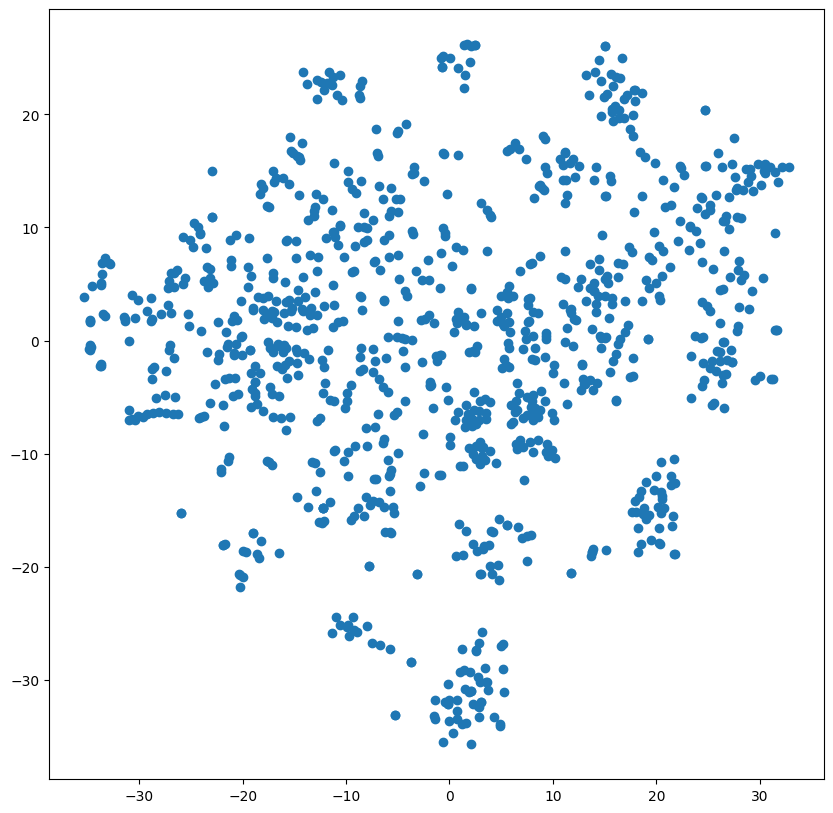

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1) # количество главных компонент, количество ближайших соседей, -1 - количество параллельных заданий для запуска поиска соседей
tsne_transformed = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

In [45]:
class DistanceOutliers(BaseEstimator):
    """
    Parameters:
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [46]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)

In [47]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(euclidian_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(euclidian_outliers)/len(df)))

Количество выбросов в выборке: 50
Процент выбросов в выборке: 5.00%


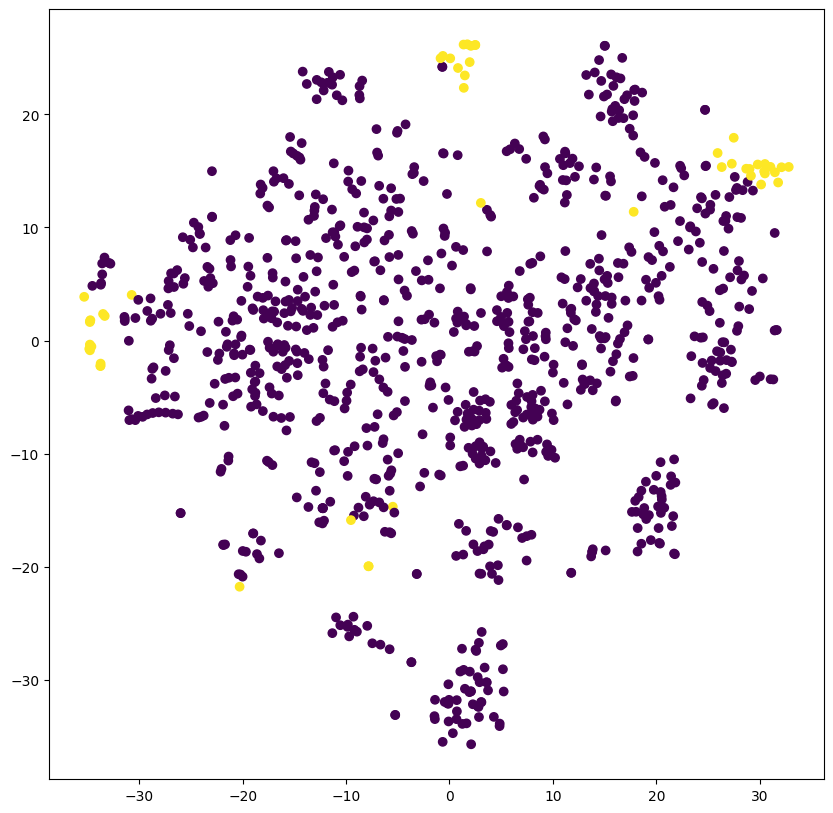

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

#### Density-based

**DBSCAN**

**Алгоритм:**
- 1. Выбираем случайную точку и находим её соседей в заданной
окрестности
- 2. Если соседей меньше критического значения – называем выбросами
- 3. Если нет – объединяем в «плотный» кластер и повторяем поиск соседей
- 4. Если все плотные точки пройдены и помечены как посещенные – выбираем новую не посещенную точку и начинаем сначала

Повторяем, пока все точки не будут посещены


**Преимущества:**
- Density-based (плотностной/вероятностный) метод – умеет в сложные формы кластеров
- Поиск выбросов и аномалий в данных

**Недостатки:**
- Довольно сложный в настройке – очень чувствителен к параметру ”плотности” epsilon

Идея - аномалии должны сильно отличаться от основных данных и скорее всего попадут в "шум". Почему бы не увеличивать epsilon до тех пор, пока все "плотные" данные не окажутся в нескольких немногочисленных кластерах, а шума будет столько, сколько мы подозреваем должно быть аномалий

In [49]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(scaled_data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

In [50]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(density_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(density_outliers)/len(df)))

Количество выбросов в выборке: 97
Процент выбросов в выборке: 9.70%


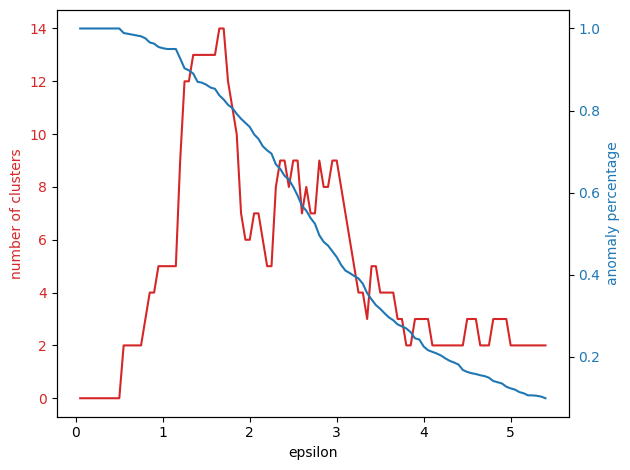

In [51]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

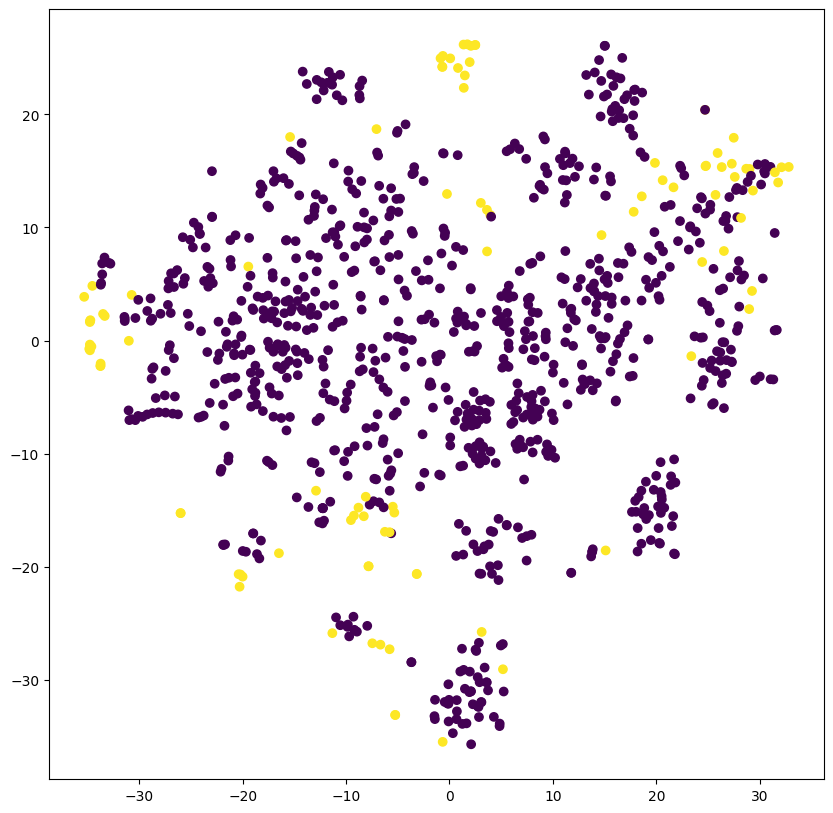

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=density_outliers);

## Unsupervised model-based

One-Class SVM (Support Vector Machine )

**Плюсы и минусы**

\+ Благодаря kernel trick, модель способна проводить **нелинейные разделяющие границы**

\+ Особенно удобно использовать, когда в данных недостаточно "плохих" наблюдений, чтобы использовать стандартный подход обучения с учителем - бинарную классификацию

\- Необходимо заранее знать процент аномалий в данных (гиперпараметр `nu`)

\- Может очень сильно **переобучиться** и выдавать большое количество ложно отрицательных результатов, если разделяющий зазор слишком мал

In [53]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.02, gamma='auto') # nu - Верхняя граница доли ошибок обучения и нижняя граница доли опорных векторов.
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [54]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(svm_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(svm_outliers )/len(df)))

Количество выбросов в выборке: 76
Процент выбросов в выборке: 7.60%


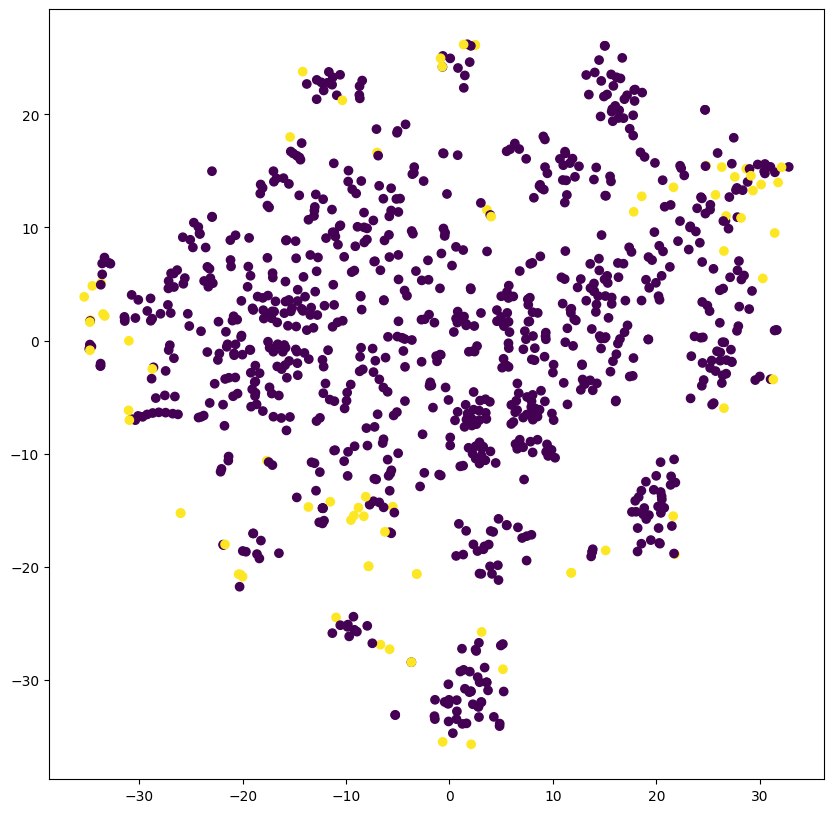

In [55]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=svm_outliers);

# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = svm_outliers
# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['X', 'o'],  palette='bright');

### Isolation Forest

Идея - давайте посмотрим, насколько легко можно "изолировать" наблюдение от всех остальных. Если слишком легко, наверное она лежит далеко и является выбросом. Если очень тяжело - скорее всего она похожа на кучу других точек и выбросом не является.


**Алгоритм:**
1. Выберите точку, которую нужно изолировать.
2. Для каждой фичи установите диапазон изоляции между минимальным и максимальным.
3. Выберите фичу случайным образом.
4. Выберите значение, которое находится в диапазоне, опять же случайным образом:
    - Если точка лежит выше выбранного значение, сдвиньте минимальный диапазон фичи на это значение.
    - Если точка лежит ниже, сдвиньте максимальное значение фичи на значение.
5. Повторите шаги 3 и 4, пока точка не будет изолирована. То есть до тех пор, пока точка не станет единственной, находящейся внутри диапазона для всех фичей.
6. Посчитайте, сколько раз вам пришлось повторить шаги 3 и 4.

In [56]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [57]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(isolation_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(isolation_outliers)/len(df)))

Количество выбросов в выборке: 50
Процент выбросов в выборке: 5.00%


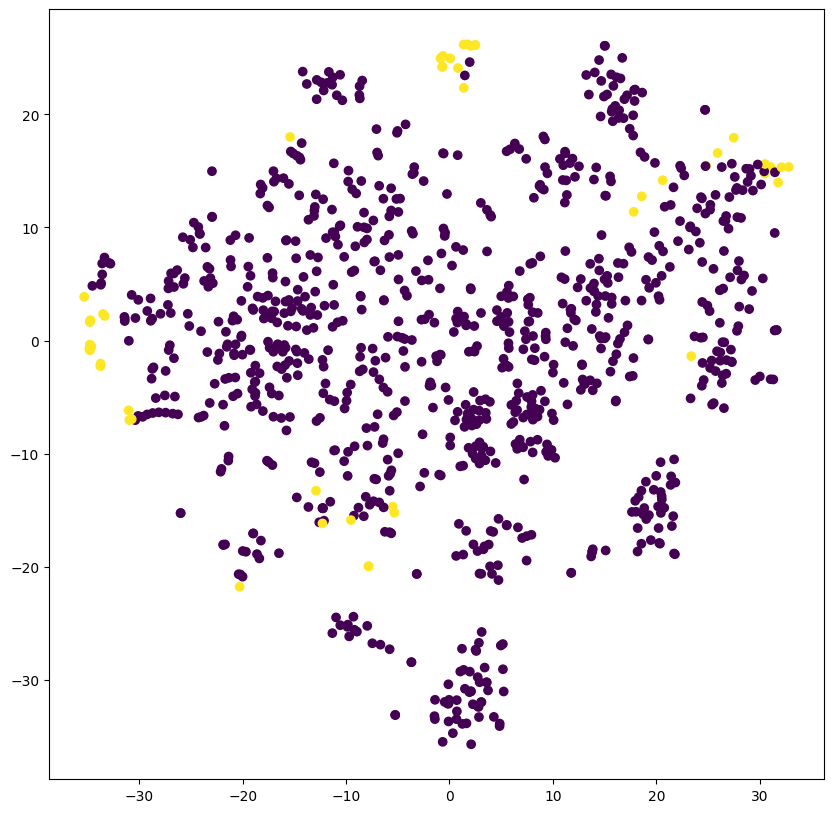

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=isolation_outliers);

### Финальное сравнение

In [59]:
summary = np.concatenate((
    [sigma_outliers],
    [iqr_outliers],
    [hier_outliers],
    [euclidian_outliers],
    [density_outliers],
    [svm_outliers],
    [isolation_outliers]
))

In [60]:
summary = pd.DataFrame(
    summary.T,
    columns=['sigma', 'iqr', 'hierarhical', 'euclid', 'dbscan', 'svm', 'isolation']
)
summary.head()

sigma  iqr  hierarhical  euclid  dbscan  svm  isolation
0      1    1            0       1       1    1          1
1      1    1            0       1       1    0          0
2      1    1            0       1       1    1          1
3      1    1            0       1       1    0          1
4      1    1            0       1       1    0          1

In [61]:
summary.shape

(1000, 7)

In [62]:
summary.sum(axis=0)

sigma          158
iqr            504
hierarhical      1
euclid          50
dbscan          97
svm             76
isolation       50
dtype: int64

In [63]:
summary.sum(axis=1).value_counts()

0    496
1    311
2     84
4     38
3     34
5     19
6     18
Name: count, dtype: int64

In [64]:
summary.mean(axis=1)

0      0.857143
1      0.571429
2      0.857143
3      0.714286
4      0.714286
         ...   
995    0.714286
996    0.142857
997    0.142857
998    0.285714
999    0.142857
Length: 1000, dtype: float64

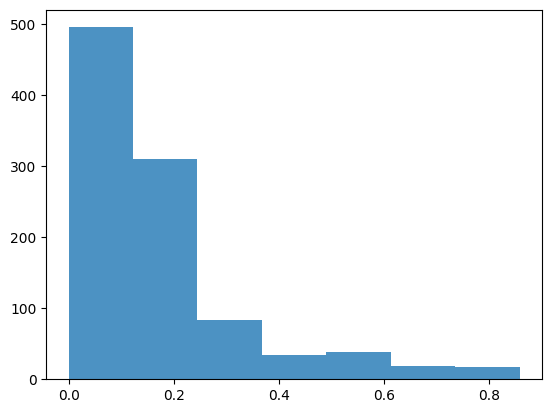

In [65]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.8, bins =7);

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Fraud', 'Fraud'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

3 Sigma Accuracy: 0.86
3 Sigma Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       983
           1       0.10      0.94      0.18        17

    accuracy                           0.86      1000
   macro avg       0.55      0.90      0.55      1000
weighted avg       0.98      0.86      0.91      1000



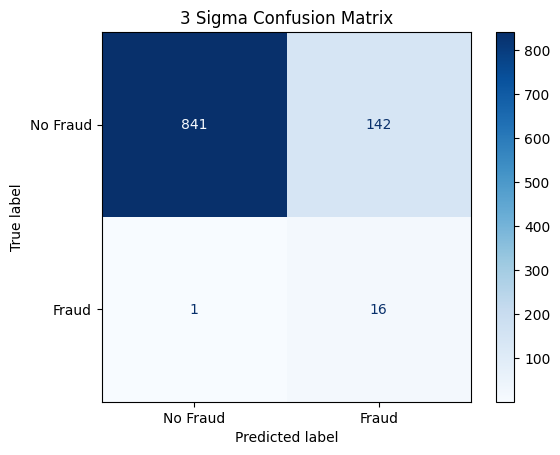

In [76]:
evaluate_model(y_test = y_test, y_pred = sigma_outliers, model_name = '3 Sigma')

Межквартильное расстояние Accuracy: 0.51
Межквартильное расстояние Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       983
           1       0.03      1.00      0.07        17

    accuracy                           0.51      1000
   macro avg       0.52      0.75      0.37      1000
weighted avg       0.98      0.51      0.66      1000



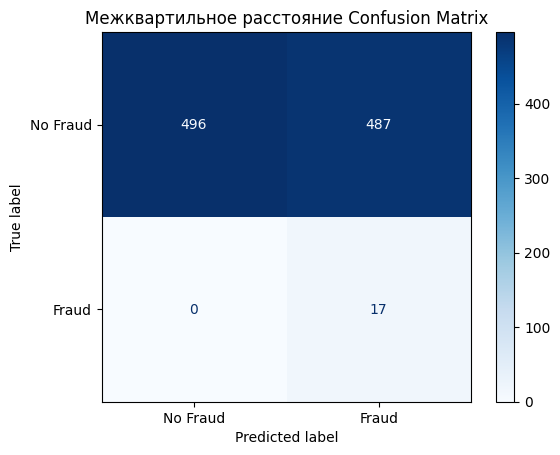

In [67]:
evaluate_model(y_test = y_test, y_pred = iqr_outliers, model_name = 'Межквартильное расстояние')

Иерархическая кластеризация Accuracy: 0.98
Иерархическая кластеризация Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       983
           1       0.00      0.00      0.00        17

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.98      0.97      1000



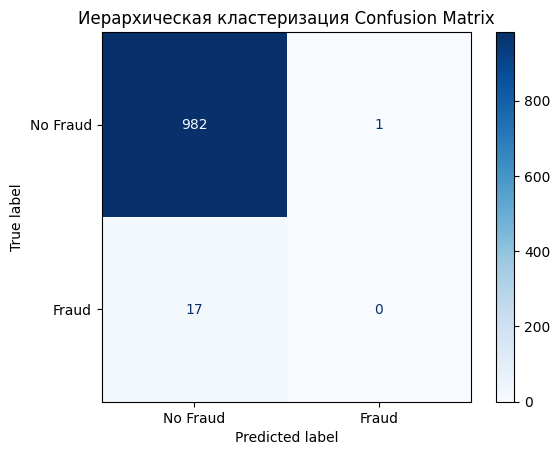

In [68]:
evaluate_model(y_test = y_test, y_pred = hier_outliers, model_name = 'Иерархическая кластеризация')

Евклидово расстояние Accuracy: 0.96
Евклидово расстояние Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       983
           1       0.28      0.82      0.42        17

    accuracy                           0.96      1000
   macro avg       0.64      0.89      0.70      1000
weighted avg       0.98      0.96      0.97      1000



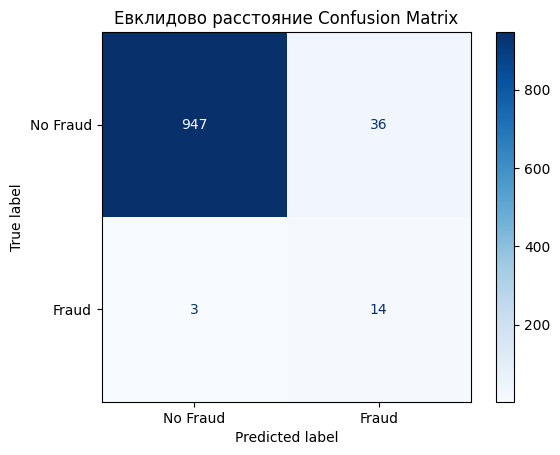

In [69]:
evaluate_model(y_test = y_test, y_pred = euclidian_outliers, model_name = 'Евклидово расстояние')

DBSCAN Accuracy: 0.92
DBSCAN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       983
           1       0.16      0.94      0.28        17

    accuracy                           0.92      1000
   macro avg       0.58      0.93      0.62      1000
weighted avg       0.98      0.92      0.95      1000



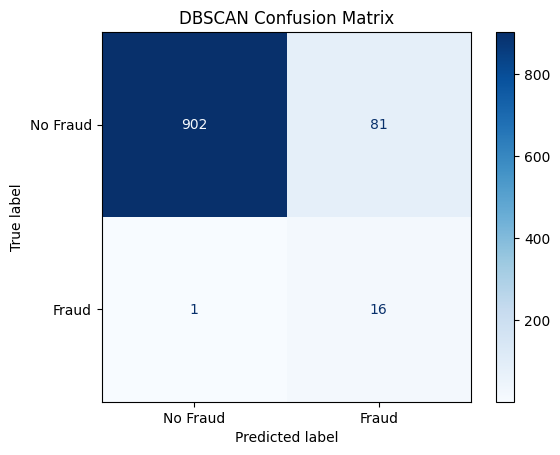

In [70]:
evaluate_model(y_test = y_test, y_pred = density_outliers, model_name = 'DBSCAN')

SVM Accuracy: 0.92
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       983
           1       0.07      0.29      0.11        17

    accuracy                           0.92      1000
   macro avg       0.53      0.61      0.53      1000
weighted avg       0.97      0.92      0.94      1000



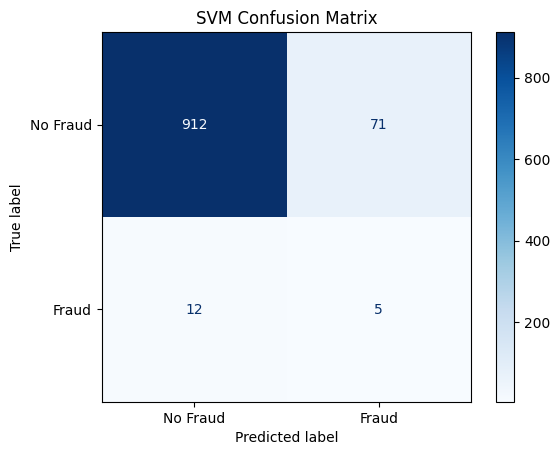

In [71]:
evaluate_model(y_test = y_test, y_pred = svm_outliers, model_name = 'SVM')

Isolation forest Accuracy: 0.96
Isolation forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       983
           1       0.28      0.82      0.42        17

    accuracy                           0.96      1000
   macro avg       0.64      0.89      0.70      1000
weighted avg       0.98      0.96      0.97      1000



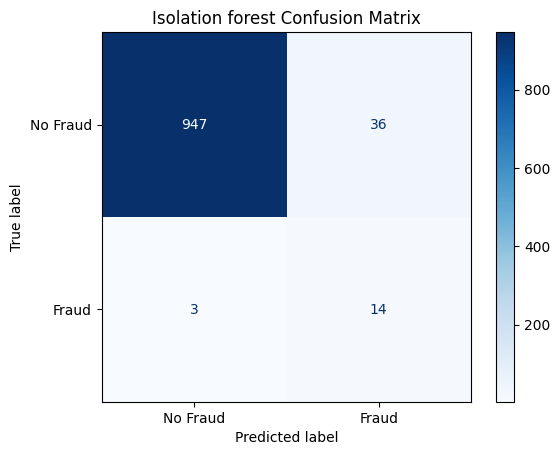

In [72]:
evaluate_model(y_test = y_test, y_pred = isolation_outliers, model_name = 'Isolation forest')

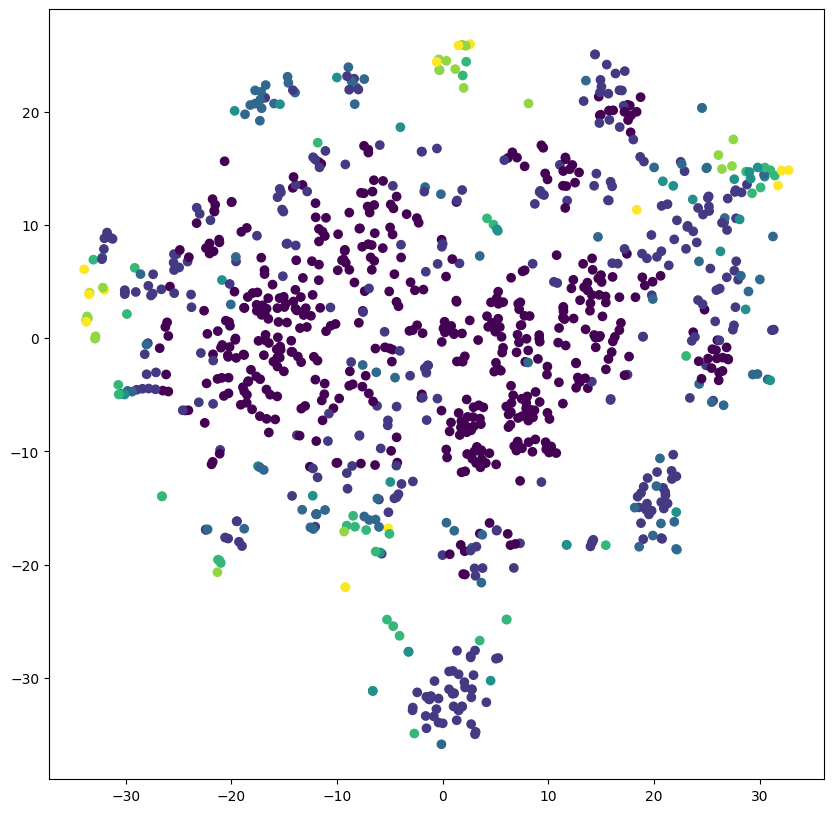

In [72]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=outlier_score);

Исходя из полученных результатов, можно сказать, что наиболее преближенные к экспертной оценке результаты были получены в Distance Based кластеризации и в Isolation Forest.
Количество и процент выбросов в выборке: 50 и 5.00% и там и там соотвтественно. F1 - score и там и там 0.42 для класса Fraud (1). Однако визуально выбросы в Distance Based кластеризации лежат дальше от основной массы точек, чем в Isolation Forest.